# imports

In [1649]:
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

# Reading data from dataset

In [1650]:
data=pd.read_csv(r'\Users\dbansbanka\Downloads\vumonic_ride_hailing_01_23.csv',encoding="utf-8")

C:\Users\dbansbanka\AppData\Local\Temp\ipykernel_30276\118510815.py:1: DtypeWarning: Columns (26,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'\Users\dbansbanka\Downloads\vumonic_ride_hailing_01_23.csv',encoding="utf-8")


In [1651]:
data.head(20)

,mid,transaction_code,user_code,company,sender_id,base_fare,additional_distance_fee,additional_ridetime_fee,fare_increase,fare_decrease,surge_fee,driver_allowance,convenience_fee,subtotal,access_fee,booking_fee,waiting_fee,reservation_fee,parking_fee,pickup_and_dropoff_fee,toll_fee,interstate_fee,taxes,donation,tip,past_unsettled_fee,other_charges_fee,discount_amount,promotion_amount,amount_paid,other_charges,applied_coupon,email_timestamp,user_onboard_at,user_inactive_at,month,year,day,payment_method,currency_code,trip_start_time,trip_end_time,trip_duration_seconds,trip_distance_in_kms,vehicle_type,driver_id,pickup_postal_code,drop_postal_code,mapped_postal_code,pickup_city,drop_city,city,district,district_grp,state,zone,metro,tier,user_dob,user_age,age_group,user_gender,user_postal_code,user_country_name,user_state,user_os_type
0,<5c34d98e-a181-5e16-ba04-46c6fcabb5f1@mail.ube...,20613b2bb698641f53fd8dbe7c8e0e05,b8b2daaebf7278697b6c90656bc2d920,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.11,NaN,11.00,NaN,NaN,NaN,NaN,NaN,NaN,15.85,NaN,NaN,NaN,NaN,NaN,21.77,250.00,NaN,NaN,2023-01-01 14:43:41+00:00,2020-04-09 20:14:02+00:00,NaN,1,2023,1,Cash,INR,12:16,12:59,2460.0,17.22,Uber Auto,4d395bfd16337b286c9187a78bce831b,500034.0,500034.0,500034.0,hyderabad,hyderabad,hyderabad,hyderabad,hyderabad,telangana,south,yes,tier1,2001.0,22.0,18-25,male,500018.0,India,Telangana,android
1,<127cb1b9-a2a2-51d3-8ca6-682e2d78661d@mail.ube...,85713963a586c251e9980fab16e421da,29c6682c68da026b347a9b91a3b91978,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.29,NaN,36.00,NaN,NaN,NaN,NaN,NaN,NaN,13.34,NaN,NaN,NaN,NaN,NaN,37.95,278.00,NaN,NaN,2023-01-01 21:31:20+00:00,2020-08-26 06:16:08+00:00,NaN,1,2023,1,Cash,INR,20:56,21:30,2040.0,17.91,Uber Auto,80addf46b5d3496110cb14ca43dba0e3,400706.0,400706.0,400706.0,navi mumbai,navi mumbai,navi mumbai,thane,mumbai mpr,maharashtra,west,yes,tier1,1983.0,40.0,35-45,female,400070.0,India,Maharashtra,android
2,<8bdc9469-8535-53d4-ad03-d7c54dff0eeb@mail.ube...,1ce949046bb4dcb20b791aa547b0a66f,bc00b944accb6961b6095f98360b8a67,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.93,NaN,NaN,NaN,NaN,NaN,NaN,425.39,NaN,NaN,2023-01-01 11:24:16+00:00,2022-06-21 18:53:09+00:00,NaN,1,2023,1,Paytm,INR,10:45,11:23,2280.0,15.19,Uber Go,71c0f5fee9bac9885cedc004a6413db9,560001.0,560001.0,560001.0,bangalore,bangalore,bangalore,bangalore,bengaluru,karnataka,south,yes,tier1,1985.0,38.0,35-45,male,560076.0,India,Karnataka,ios
3,<6aa1af35-1ce8-5dc4-b53c-417717708c0c@mail.ube...,50b78ebad36ae14a78b97fd023d00c39,bc00b944accb6961b6095f98360b8a67,uber,noreply@uber.com,203.54,NaN,NaN,NaN,NaN,91.81,NaN,NaN,295.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.90,NaN,NaN,NaN,NaN,NaN,NaN,192.20,NaN,NaN,2023-01-01 17:13:06+00:00,2022-06-21 18:53:09+00:00,NaN,1,2023,1,Paytm,INR,16:51,17:12,1260.0,6.83,Uber Go,ad6160dabadf4548e92b589f43af6450,560075.0,560075.0,560075.0,bangalore,bangalore,bangalore,bangalore,bengaluru,karnataka,south,yes,tier1,1985.0,38.0,35-45,male,560076.0,India,Karnataka,ios
4,<cb561d01-b755-590d-b36c-0e0e9f1ad43d@mail.ube...,5cb188772319c233944dcd69f3393394,bc00b944accb6961b6095f98360b8a67,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.14,NaN,NaN,NaN,NaN,NaN,32.77,267.76,NaN,NaN,2023-01-01 18:38:53+00:00,2022-06-21 18:53:09+00:00,NaN,1,2023,1,Paytm,INR,18:12,18:38,1560.0,8.60,Uber Go,da5ccdd997cdd955a0f35b90cd816d36,560037.0,560037.0,560037.0,bangalore,bangalore,bangalore,bangalore,bengaluru,karnataka,south,yes,tier1,1985.0,38.0,35-45,male,560076.0,India,Karnataka,ios
5,<cc7c1e0f-191e-558f-a8d5-6649466076b0@mail.ube...,77b941d544a0eb04299f0f9aae18eec7,a143ccb88c581cd6301e9b5bdc362e8b,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.00,NaN,2.65,NaN,NaN,NaN,NaN,NaN,NaN,10.32,NaN,NaN,NaN,NaN,NaN,NaN,140.65,NaN,NaN,2023-01-01 14:48:41+00:00,2021-02-20 06:11:55+00:00,NaN,1,2023,1,UPI,INR,14:35,14:48,720.0,1.59,Uber Go,d123ff

In [1652]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48490 entries, 0 to 48489
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mid                      48490 non-null  object 
 1   transaction_code         48490 non-null  object 
 2   user_code                48490 non-null  object 
 3   company                  48490 non-null  object 
 4   sender_id                48490 non-null  object 
 5   base_fare                1581 non-null   float64
 6   additional_distance_fee  1114 non-null   float64
 7   additional_ridetime_fee  1025 non-null   float64
 8   fare_increase            440 non-null    float64
 9   fare_decrease            314 non-null    float64
 10  surge_fee                418 non-null    float64
 11  driver_allowance         13 non-null     float64
 12  convenience_fee          64 non-null     float64
 13  subtotal                 48490 non-null  float64
 14  access_fee            

In [1653]:
data.isnull().sum()

mid                     0
transaction_code        0
user_code               0
company                 0
sender_id               0
                     ... 
user_gender          2454
user_postal_code     3699
user_country_name     741
user_state           3299
user_os_type         4339
Length: 66, dtype: int64

# Data Cleaning

1.Made boxplot,catplot,barchart to analyse correlation between target and independent variables.


In [1654]:
pd.set_option('display.max_columns',None)

# Dropped columns irrelevant to target variable


In [1655]:
data.drop(['mid','transaction_code','user_code','sender_id','email_timestamp','user_inactive_at','month','year','currency_code','driver_id','user_dob','user_postal_code','user_country_name','driver_allowance','convenience_fee','reservation_fee','parking_fee','tip','user_os_type','reservation_fee'],axis=1,inplace=True)

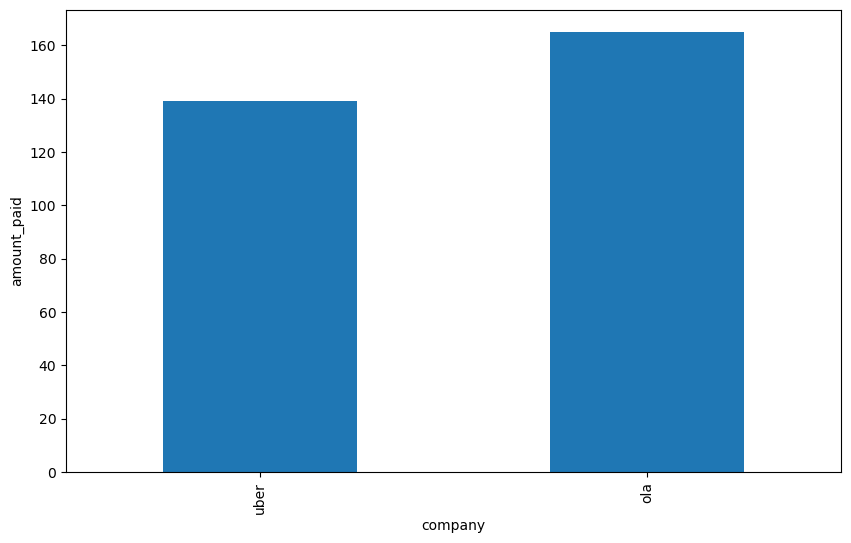

In [1656]:
plt.figure(figsize=(10,6))
data.groupby('company')['amount_paid'].median().sort_values().plot.bar()
plt.ylabel('amount_paid')
plt.show()

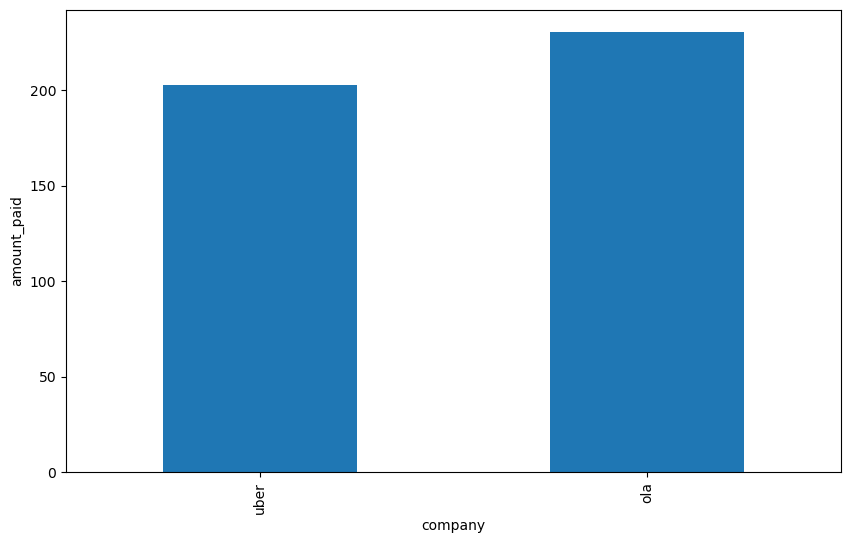

In [1657]:
plt.figure(figsize=(10,6))
data.groupby('company')['amount_paid'].mean().sort_values().plot.bar()
plt.ylabel('amount_paid')
plt.show()

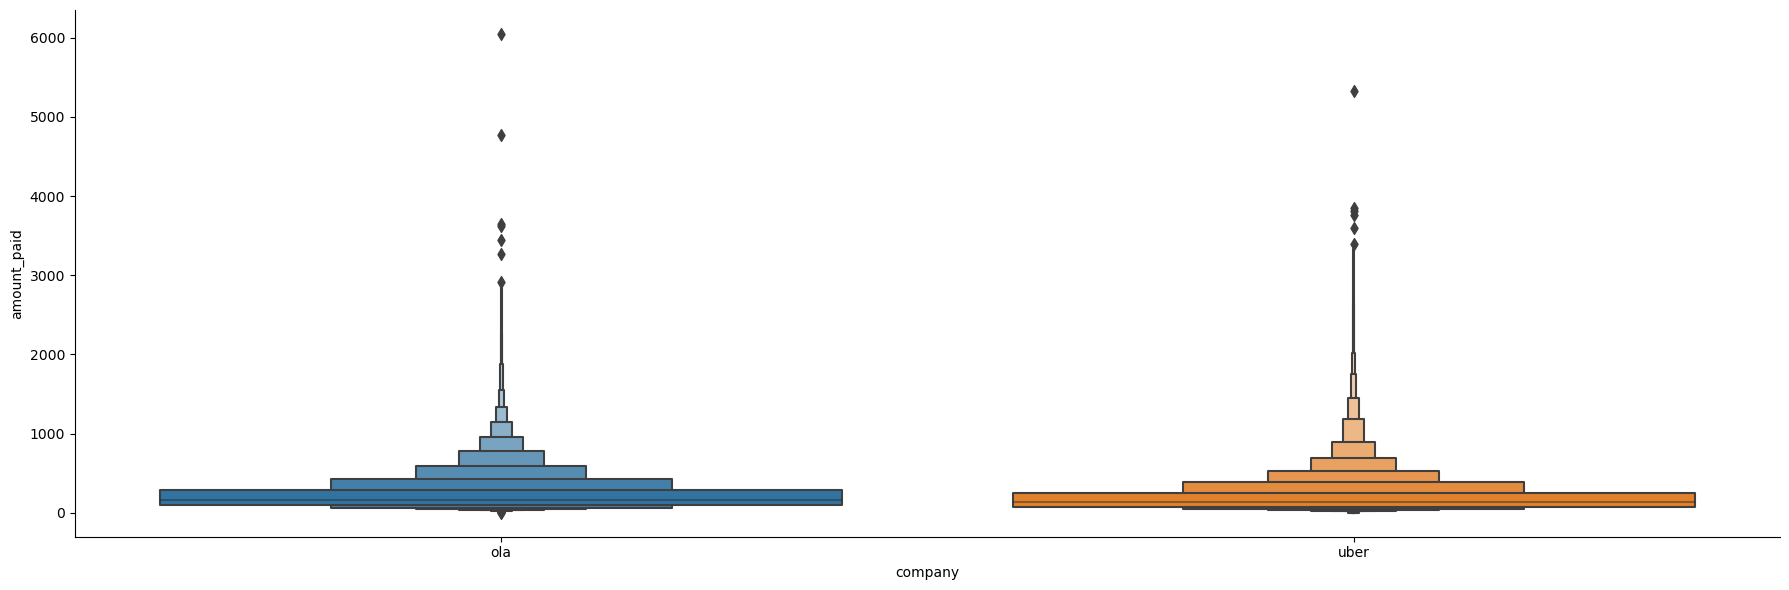

In [1658]:
sns.catplot(y = "amount_paid", x = "company", data =data.sort_values("amount_paid", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


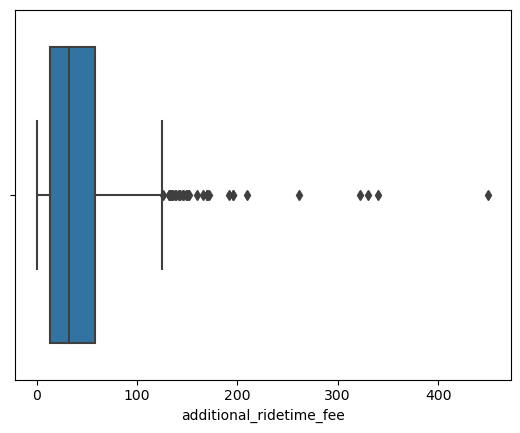

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


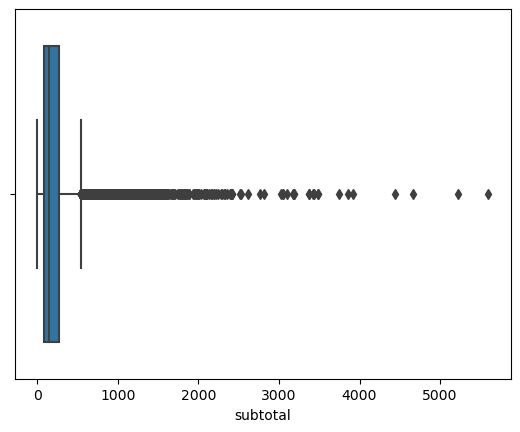

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


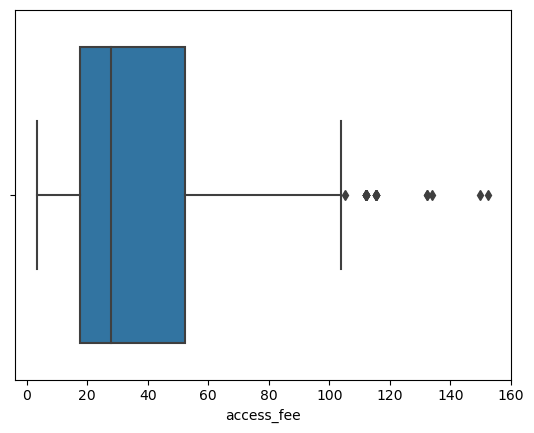

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


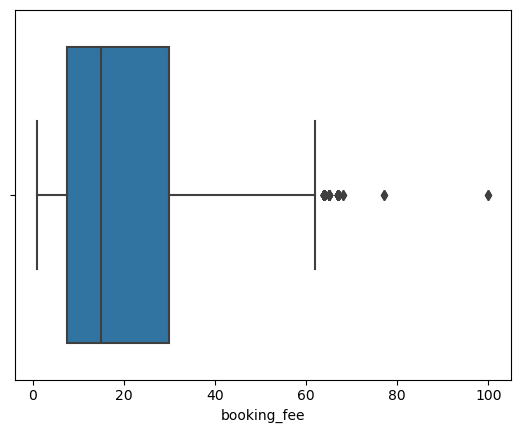

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


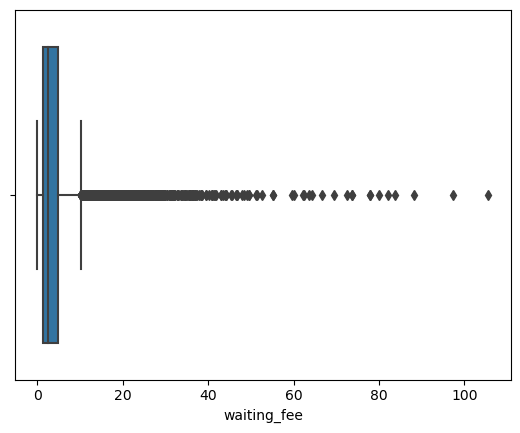

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


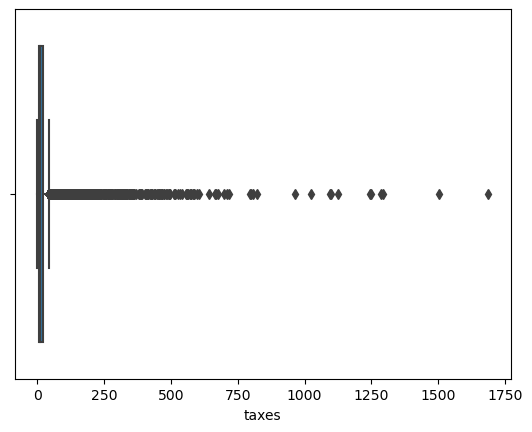

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


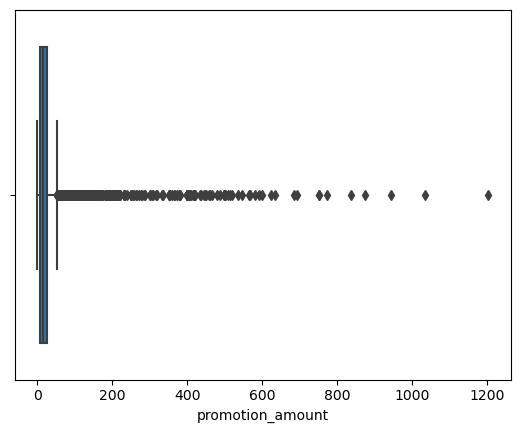

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


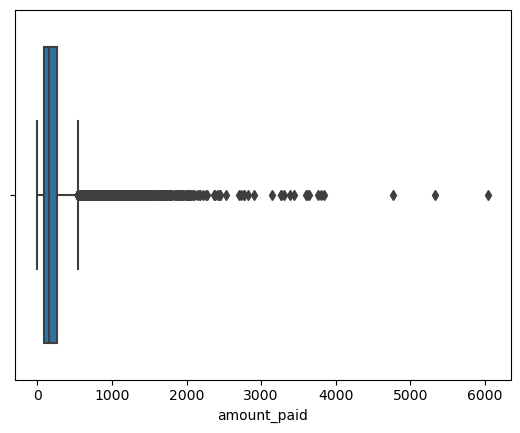

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


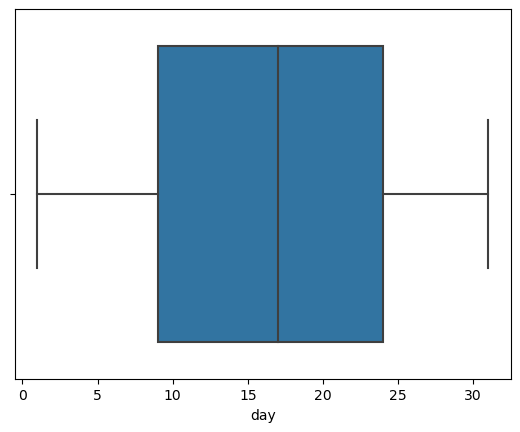

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


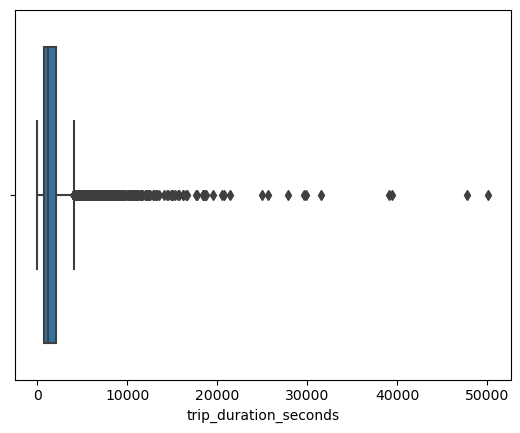

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


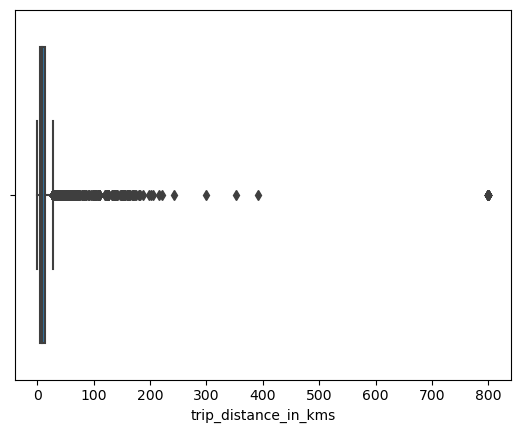

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


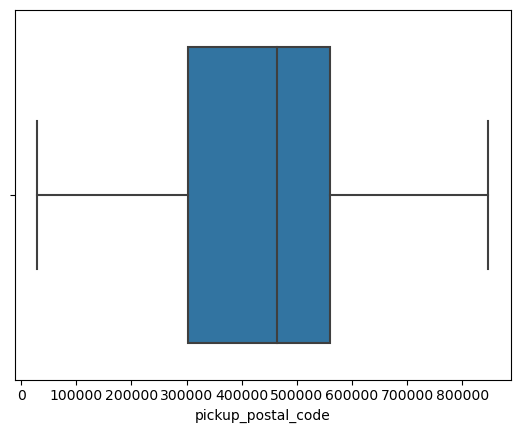

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


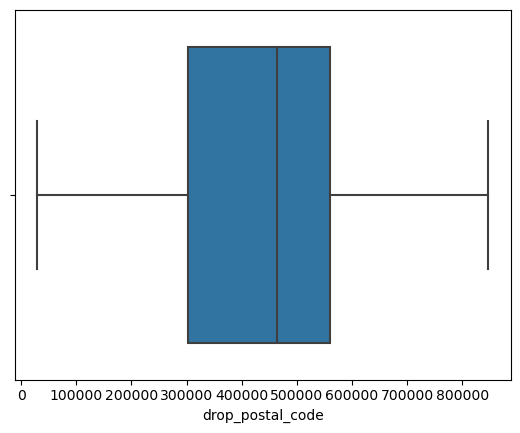

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


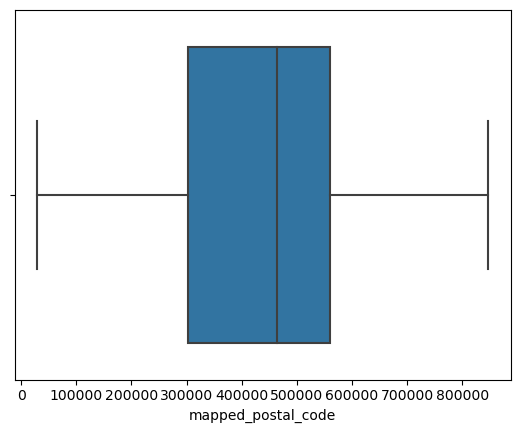

KeyError: 'trip_start_time_min'

In [1659]:
for feature in cont_features:
    sns.boxplot(data[feature])
    plt.show()


In [ ]:
for feature in disc_feature:
    sns.boxplot(data[feature])
    plt.show()

In [ ]:
for feature in cont_features:
    plt.scatter(data[feature],data['amount_paid'])
    plt.xlabel(feature)
    plt.ylabel('Amount Paid')
    plt.show()


# Categorizing variables into categorical and numerical variables based on datatype
Further dividing numerical in continous and discrete variables

In [ ]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
num_features=[feature for feature in data.columns if data[feature].dtype!='O']
cont_features=[feature for feature in num_features if len(data[feature].unique())>25]
disc_feature=[feature for feature in num_features if len(data[feature].unique())<25]

In [ ]:
for feature in cat_features:
    print(feature,len(data[feature].unique()))

# Replacing null values to non-null based on observation of mean,median,mode of the respective variable.
Replacing data having less frequency with data having significant frequency.
(To handle data-loss and convert into meaningful dataset)

In [ ]:
array=data['company'].value_counts().sort_values(ascending=False).to_dict()
company_array_map={k:i for i,k in enumerate(array,0)}
data['company_encoded']=data['company'].map(company_array_map)
array


In [ ]:
array=data['payment_method'].value_counts().sort_values(ascending=False).to_dict()
data['payment_method'].replace({'VPA':'cash','0413 (India)':'cash','2850':'cash','UPI|Switch':'cash',
                                 'Voucher':'cash','Meet Bhavinbhai':'cash','PhonePe Wallet':'cash','Cash':'cash'},inplace=True)
data['payment_method'].fillna('cash',inplace=True)
payment_array=data['payment_method'].value_counts().sort_values(ascending=False).to_dict()
payment_array_map={k:i for i,k in enumerate(payment_array,0)}
data['payment_method_encoded']=data['payment_method'].map(payment_array_map)

In [ ]:
cat_feature_encoded_list=["payment_method","metro","tier","user_gender","user_state","age_group","zone","state",]

In [ ]:
metro_array=data['metro'].value_counts().sort_values(ascending=False).to_dict()
metro_array_map={k:i for i,k in enumerate(metro_array,0)}
data['metro'].fillna('yes',inplace=True)
data['metro_encoded']=data['metro'].map(metro_array_map)
metro_array_map

In [ ]:
for feature in cat_feature_encoded_list:
    print(feature,data[feature].value_counts().sort_values(ascending=False).to_dict())
    print(feature,data[feature].isnull().sum())

In [ ]:
tier_array=data['tier'].value_counts().sort_values(ascending=False).to_dict()
tier_array

In [ ]:
tier_array=data['tier'].value_counts().sort_values(ascending=False).to_dict()
tier_array_map={k:i for i,k in enumerate(tier_array,0)}
data['tier'].fillna('tier1',inplace=True)
data['tier_encoded']=data['tier'].map(tier_array_map)
tier_array_map

In [ ]:
user_gender_array=data['user_gender'].value_counts().sort_values(ascending=False).to_dict()
data['user_gender'].replace({'yes':'male','other':'male','not selected':'male'},inplace=True)
data['user_gender'].fillna('male',inplace=True)
user_gender_array_map={k:i for i,k in enumerate(user_gender_array,0)}
data['user_gender_encoded']=data['user_gender'].map(user_gender_array_map)
user_gender_array_map

In [ ]:
user_state_array=data['user_state'].value_counts().sort_values(ascending=False).to_dict()
data['user_state'].replace({'Tripura':'Maharashtra', 'Nagaland':'Maharashtra', 'Union Territory of Puducherry':'Maharashtra','Andaman and Nicobar':'Maharashtra', 'Arunachal Pradesh':'Maharashtra', 'Jammu and Kashmir':'Maharashtra'},inplace=True)
data['user_state'].fillna('Maharashtra',inplace=True)
user_state_array_map={k:i for i,k in enumerate(user_state_array,0)}
data['user_state_encoded']=data['user_state'].map(user_state_array_map)
user_state_array_map

In [ ]:
age_group_array=data['age_group'].value_counts().sort_values(ascending=False).to_dict()
data['age_group'].fillna('25-35',inplace=True)
age_group_array_map={k:i for i,k in enumerate(age_group_array,0)}
data['age_group_encoded']=data['age_group'].map(age_group_array_map)
age_group_array_map

In [ ]:
zone_array=data['zone'].value_counts().sort_values(ascending=False).to_dict()
data['zone'].fillna('south',inplace=True)
zone_array_map={k:i for i,k in enumerate(zone_array,0)}
data['zone_encoded']=data['zone'].map(zone_array_map)
zone_array_map

In [ ]:
state_array=data['state'].value_counts().sort_values(ascending=False).to_dict()
data['state'].replace({'chattisgarh':'maharashtra', 'goa':'maharashtra', 'jammu & kashmir':'maharashtra', 'pondicherry':'maharashtra', 'daman & diu':'maharashtra', 'manipur':'maharashtra'},inplace=True)
data['state'].fillna('maharashtra',inplace=True)
state_array_map={k:i for i,k in enumerate(state_array,0)}
data['state_encoded']=data['state'].map(state_array_map)
state_array_map
data['state_encoded']

In [ ]:
for feature in cont_features:
    print(feature,np.mean(data[feature]))
    print(feature,data[feature].isnull().sum())

In [ ]:
data.drop(['base_fare','additional_distance_fee','fare_increase','fare_decrease','surge_fee','toll_fee','pickup_and_dropoff_fee','past_unsettled_fee','discount_amount','donation','user_onboard_at','applied_coupon','city','district_grp','other_charges','other_charges_fee'],inplace=True,axis=1)

# Deriving three types of vehicle type category

In [ ]:
ans=[]
for i in data['vehicle_type']:
    listt=str(i).split(' ')
    if listt[0]=="Connect" or listt[0]=="Moto" or listt[0]=="Bike":
        new_value="Bike"
    elif len(listt)>1 and listt[1]=="Moto":
        new_value="Bike"
    elif listt[0]=="Auto":
        new_value="Auto"
    elif len(listt)>1 and listt[1]=="Auto":
        new_value="Auto"
    else:
        new_value="Cab"
    ans.append(new_value)
data['vehicle_type'] = ans
vehicle_type_array=data['vehicle_type'].value_counts().sort_values(ascending=False).to_dict()
data['vehicle_type'].fillna('Cab',inplace=True)
vehicle_type_array_map={k:i for i,k in enumerate(vehicle_type_array,0)}
data['vehicle_type_encoded']=data['vehicle_type'].map(vehicle_type_array_map)
vehicle_type_array_map

# Converting Categorical variables to label encoded data.

In [ ]:
trip_time_list=["trip_start_time","trip_end_time"]
for i in trip_time_list:
    data[i].fillna(0,inplace=True)
    trip_start_time_array=data[i].to_list()
    duration_hour=[]
    duration_min=[]
    for item in trip_start_time_array:
        if(item == 0):
            duration_hour.append(0)
            duration_min.append(0)
        else:
            split_data=item.split(":")
            duration_hour.append(int(split_data[0]))
            duration_min.append(int(split_data[1]))
    hour_mean=np.mean(duration_hour)
    min_mean=np.mean(duration_min)
    encoded_hour_column=i+"_hour"
    encoded_min_column=i+"_min"
    data[encoded_hour_column]=duration_hour
    data[encoded_min_column]=duration_min

    for i in data[encoded_hour_column]:
        if i==0:
            i=hour_mean

    for i in data[encoded_min_column]:
        if i==0:
            i=min_mean

In [ ]:
city_list_encoded=['pickup_city','drop_city','district']
for feature in city_list_encoded:
    print(feature,data[feature].value_counts().sort_values(ascending=False).to_dict())
    print(feature,data[feature].isnull().sum())

In [ ]:
pickup_city_array=data['pickup_city'].value_counts().sort_values(ascending=False).to_dict()
data['pickup_city'].replace({'bengaluru':'bangalore','aurangabad':'bangalore', 'raipur':'bangalore', 'amer':'bangalore', 'amritsar':'bangalore', 'gwalior': 'bangalore', 'miraj':'bangalore', 'gorakhpur':'bangalore', 'virar':'bangalore', 'rourkela':'bangalore', 'dadri':'bangalore', 'tiruchirappalli': 'bangalore', 'badlapur':'bangalore', 'kharagpur':'bangalore', 'jabalpur':'bangalore', 'jagraon':'bangalore', 'ranga reddy':'bangalore', 'nallasopara':'bangalore', 'tambaram':'bangalore', 'aluva':'bangalore', 'nellore':'bangalore', 'kochi':'bangalore', 'cuttack':'bangalore', 'jamshedpur':'bangalore', 'sitapur': 'bangalore', 'tirupati':'bangalore', 'jalandhar':'bangalore', 'raipur rani':'bangalore', 'sonipat':'bangalore', 'rajpura': 'bangalore', 'bangalore north':'bangalore', 'rajahmundry':'bangalore', 'grasim vihar rawan':'bangalore', 'kanchipuram':'bangalore', 'east godavari':'bangalore', 'abu road':'bangalore', 'dharamkot':'bangalore', 'sriperumpudur':'bangalore', 'koch bihar':'bangalore', 'thrissur':'bangalore', 'thanjavur':'bangalore', 'bangalore south':'bangalore', 'mangalagiri':'bangalore', 'ramachandrapuram':'bangalore', 'jagiroad':'bangalore', 'sriperumbudur': 'bangalore', 'ranip': 'bangalore', 'ambala city': 'bangalore', 'thiruvananthapuram': 'bangalore', 'salem': 'bangalore', 'ambala': 'bangalore', 'patiala': 'bangalore', 'karimnagar': 'bangalore', 'baghpat': 'bangalore', 'barabanki': 'bangalore', 'north parganas': 'bangalore', 'hoskote': 'bangalore', 'uttarpara': 'bangalore', 'warangal': 'bangalore', 'bareilly': 'bangalore', 'bilaspur': 'bangalore', 'siliguri': 'bangalore', 'north guwahati': 'bangalore', 'tiruvallur': 'bangalore', 'rajkot': 'bangalore', 'narasannapeta': 'bangalore', 'kakinada': 'bangalore', 'chengalpattu': 'bangalore', 'patna sadar': 'bangalore', 'barasat': 'bangalore', 'parkal': 'bangalore', 'kalol': 'bangalore', 'mainpuri': 'bangalore', 'depalpur': 'bangalore', 'krishna': 'bangalore', 'kozhikode': 'bangalore', 'shivajinagar': 'bangalore', 'salempur': 'bangalore', 'sonepat': 'bangalore', 'durg': 'bangalore', 'bahadurgarh': 'bangalore', 'anakapalle': 'bangalore', 'modinagar': 'bangalore', 'bhadreswar': 'bangalore', 'sadar': 'bangalore', 'berhampur': 'bangalore', 'vaishali': 'bangalore', 'sohna': 'bangalore', 'ramapuram': 'bangalore', 'ramanathapuram': 'bangalore', 'pondicherry': 'bangalore', 'puri': 'bangalore', 'meerut': 'bangalore', 'jatni': 'bangalore', 'kalmeshwar': 'bangalore', 'perumbavoor': 'bangalore', 'kurali': 'bangalore', 'mamallapuram': 'bangalore', 'bulandshahr': 'bangalore', 'mahabub nagar': 'bangalore', 'tohana': 'bangalore', 'bangalore rural': 'bangalore', 'err':'bangalore', 'mubarakpur': 'bangalore', 'kalanwali': 'bangalore', 'mohpa': 'bangalore', 'loni': 'bangalore', 'vapi': 'bangalore', 'bokaro': 'bangalore', 'aroor': 'bangalore', 'jamnagar': 'bangalore', 'south goa': 'bangalore', 'sawer': 'bangalore', 'charkhi dadri': 'bangalore', 'hanuman junction': 'bangalore', 'mandi dabwali': 'bangalore', 'patancheru': 'bangalore', 'central delhi': 'bangalore', 'narendra nagar': 'bangalore', 'rishra': 'bangalore', 'jhansi': 'bangalore', 'khandala': 'bangalore', 'durgapur': 'bangalore', 'rewari stn': 'bangalore', 'koilkuntla': 'bangalore', 'mathura': 'bangalore', 'neral': 'bangalore', 'anand': 'bangalore', 'konnagar': 'bangalore', 'tirurangadi': 'bangalore', 'kaipamangalam': 'bangalore', 'dharwad': 'bangalore', 'kanpur nagar': 'bangalore', 'olpad': 'bangalore', 'villupuram': 'bangalore', 'anantapur': 'bangalore', 'pen': 'bangalore', 'alappuzha': 'bangalore', 'mahboobnagar': 'bangalore', 'matheran': 'bangalore', 'hosur': 'bangalore', 'shirwal': 'bangalore', 'alibag': 'bangalore', 'unnao': 'bangalore', 'choutuppal': 'bangalore', 'alipore': 'bangalore', 'hapur': 'bangalore', 'gotanagar': 'bangalore', 'chakan': 'bangalore', 'cherthala': 'bangalore', 'anandpur sahib': 'bangalore', 'qadian': 'bangalore', 'dankuni': 'bangalore', 'muzaffarnagar': 'bangalore', 'khopoli': 'bangalore', 'palanpur': 'bangalore', 'siddipet': 'bangalore', 'sawai madhopur': 'bangalore', 'bari sadri': 'bangalore', 'chiknayakanhalli': 'bangalore', 'dwarka': 'bangalore', 'palwal': 'bangalore', 'khudaganj': 'bangalore', 'shahapur': 'bangalore', 'k.v.rangareddy': 'bangalore', 'asansol': 'bangalore', 'bhubaneshwar': 'bangalore', 'fatehgarh sahib': 'bangalore', 'dhanbad': 'bangalore', 'kanyakumari': 'bangalore', 'panjim': 'bangalore', 'kankinara': 'bangalore', 'palampur': 'bangalore', 'sholinghur': 'bangalore', 'kolhapur': 'bangalore', 'hooghly': 'bangalore', 'kangayam': 'bangalore', 'hamirpur': 'bangalore', 'dharuhera': 'bangalore', 'ashok nagar': 'bangalore', 'hassanpur': 'bangalore', 'srikakulam': 'bangalore', 'sanand': 'bangalore', 'amravati': 'bangalore', 'hajipur': 'bangalore', 'khairlanji': 'bangalore', 'uran': 'bangalore', 'choryasi': 'bangalore', 'melur': 'bangalore', 'krishnarajpet': 'bangalore', 'tirupur': 'bangalore', 'sikar': 'bangalore', 'cheyyar': 'bangalore', 'phagwara': 'bangalore', 'shrivardhan': 'bangalore', 'mount abu': 'bangalore', 'sangareddy':'bangalore'},inplace=True)
data['pickup_city'].fillna('bangalore',inplace=True)
pickup_city_array_map={k:i for i,k in enumerate(pickup_city_array,0)}
data['pickup_city_encoded']=data['pickup_city'].map(pickup_city_array_map)
pickup_city_array_map

In [ ]:
drop_city_array=data['drop_city'].value_counts().sort_values(ascending=False).to_dict()
data['drop_city'].fillna('bangalore',inplace=True)
data['drop_city'].replace({'bengaluru':'bangalore','aurangabad':'bangalore', 'raipur':'bangalore', 'amer':'bangalore', 'amritsar':'bangalore', 'gwalior': 'bangalore', 'miraj':'bangalore', 'gorakhpur':'bangalore', 'rourkela':'bangalore', 'dadri':'bangalore', 'virar':'bangalore', 'badlapur':'bangalore', 'kharagpur': 'bangalore', 'tiruchirappalli':'bangalore', 'jabalpur': 'bangalore', 'nallasopara': 'bangalore''bangalore', 'jagraon': 'bangalore''bangalore', 'ranga reddy': 'bangalore', 'aluva': 'bangalore', 'tambaram': 'bangalore', 'nellore': 'bangalore', 'kochi': 'bangalore', 'sitapur': 'bangalore', 'cuttack': 'bangalore', 'jamshedpur': 'bangalore', 'tirupati': 'bangalore', 'raipur rani':'bangalore', 'jalandhar':'bangalore', 'sonipat':'bangalore', 'grasim vihar rawan': 'bangalore', 'rajahmundry': 'bangalore', 'kanchipuram': 'bangalore', 'bangalore north': 'bangalore', 'rajpura': 'bangalore', 'east godavari': 'bangalore', 'abu road': 'bangalore', 'koch bihar': 'bangalore', 'thrissur': 'bangalore', 'dharamkot': 'bangalore', 'thanjavur': 'bangalore', 'mangalagiri': 'bangalore', 'bangalore south': 'bangalore', 'sriperumpudur': 'bangalore', 'sriperumbudur': 'bangalore', 'uttarpara': 'bangalore', 'thiruvananthapuram': 'bangalore', 'jagiroad': 'bangalore', 'ranip': 'bangalore', 'ramachandrapuram': 'bangalore', 'ambala city': 'bangalore', 'ambala': 'bangalore', 'north guwahati': 'bangalore', 'hoskote': 'bangalore', 'north': 'bangalore', 'parganas': 'bangalore', 'barasat': 'bangalore', 'siliguri': 'bangalore', 'salem': 'bangalore', 'karimnagar': 'bangalore', 'warangal': 'bangalore', 'bareilly': 'bangalore', 'rajkot': 'bangalore', 'barabanki': 'bangalore', 'baghpat': 'bangalore', 'tiruvallur': 'bangalore', 'patiala': 'bangalore', 'bilaspur': 'bangalore', 'kakinada': 'bangalore', 'patna sadar': 'bangalore', 'parkal': 'bangalore', 'chengalpattu': 'bangalore', 'narasannapeta': 'bangalore', 'modinagar': 'bangalore', 'mainpuri': 'bangalore', 'kozhikode': 'bangalore', 'krishna': 'bangalore', 'kalol': 'bangalore', 'bahadurgarh': 'bangalore', 'shivajinagar': 'bangalore', 'sadar': 'bangalore', 'anakapalle': 'bangalore', 'bhadreswar': 'bangalore', 'berhampur': 'bangalore', 'depalpur': 'bangalore', 'salempur': 'bangalore', 'sonepat': 'bangalore', 'durg': 'bangalore', 'south goa': 'bangalore', 'aroor': 'bangalore', 'mubarakpur': 'bangalore', 'mohpa': 'bangalore', 'kalmeshwar': 'bangalore', 'kalanwali': 'bangalore', 'sawer': 'bangalore', 'patancheru': 'bangalore', 'perumbavoor': 'bangalore', 'kurali': 'bangalore', 'mamallapuram': 'bangalore', 'sohna': 'bangalore', 'puri': 'bangalore', 'mandi dabwali': 'bangalore', 'jatni': 'bangalore', 'pondicherry': 'bangalore', 'ramapuram': 'bangalore', 'mahabub nagar': 'bangalore', 'tohana': 'bangalore', 'vapi': 'bangalore', 'ramanathapuram': 'bangalore', 'bangalore rural': 'bangalore', 'bokaro': 'bangalore', 'central delhi': 'bangalore', 'vaishali': 'bangalore', 'jamnagar': 'bangalore', 'loni': 'bangalore', 'err':'bangalore','charkhi dadri': 'bangalore', 'dharwad': 'bangalore', 'meerut': 'bangalore', 'hanuman junction': 'bangalore', 'bulandshahr': 'bangalore', 'rishra': 'bangalore', 'khandala': 'bangalore', 'muzaffarnagar': 'bangalore', 'alipore': 'bangalore', 'alibag': 'bangalore', 'shirwal': 'bangalore', 'mahboobnagar': 'bangalore', 'pen': 'bangalore', 'anandpur sahib': 'bangalore', 'hosur': 'bangalore', 'villupuram': 'bangalore', 'krishnarajpet': 'bangalore', 'uran': 'bangalore', 'matheran': 'bangalore', 'gotanagar': 'bangalore', 'olpad': 'bangalore', 'rewari stn': 'bangalore', 'durgapur': 'bangalore', 'jhansi': 'bangalore', 'unnao': 'bangalore', 'siddipet': 'bangalore', 'shahapur': 'bangalore', 'bari sadri': 'bangalore', 'mathura': 'bangalore', 'khopoli': 'bangalore', 'anand': 'bangalore', 'srikakulam': 'bangalore', 'konnagar': 'bangalore', 'kanpur nagar': 'bangalore', 'kankinara': 'bangalore', 'qadian': 'bangalore', 'koilkuntla': 'bangalore', 'anantapur': 'bangalore', 'choutuppal': 'bangalore', 'hapur': 'bangalore', 'k.v.rangareddy': 'bangalore', 'kaipamangalam': 'bangalore', 'moradabad': 'bangalore', 'neral': 'bangalore', 'kolhapur': 'bangalore', 'narendra nagar': 'bangalore', 'lunawada': 'bangalore', 'shrivardhan': 'bangalore', 'mount abu': 'bangalore', 'melur': 'bangalore', 'hamirpur': 'bangalore', 'dhanbad': 'bangalore', 'palampur': 'bangalore', 'panjim': 'bangalore', 'chiknayakanhalli': 'bangalore', 'cheyyar': 'bangalore', 'dharuhera': 'bangalore', 'sanand': 'bangalore', 'fatehgarh sahib': 'bangalore', 'asansol': 'bangalore', 'bhubaneshwar': 'bangalore', 'alappuzha': 'bangalore', 'kanyakumari': 'bangalore', 'phagwara': 'bangalore', 'sikar': 'bangalore', 'dankuni': 'bangalore', 'sawai madhopur': 'bangalore', 'cherthala': 'bangalore', 'palanpur': 'bangalore', 'tirurangadi': 'bangalore', 'hassanpur': 'bangalore', 'sholinghur': 'bangalore', 'chakan': 'bangalore', 'khudaganj': 'bangalore', 'dwarka': 'bangalore', 'tirupur': 'bangalore', 'kangayam': 'bangalore', 'palwal': 'bangalore', 'amravati': 'bangalore', 'hajipur': 'bangalore', 'khairlanji': 'bangalore', 'ashok nagar': 'bangalore', 'choryasi': 'bangalore', 'sangareddy': 'bangalore'},inplace=True)
drop_city_array_map={k:i for i,k in enumerate(drop_city_array,0)}
data['drop_city_encoded']=data['drop_city'].map(drop_city_array_map)
data['drop_city_encoded'].fillna(0,inplace=True)
drop_city_array_map

# Derived new column intercity from pickup city and dropcity

In [ ]:
data['intercity']=[-1]*(len(data))
for i in range(len(data)):
    pickup_city = data['pickup_city'].iloc[i]
    drop_city = data['drop_city'].iloc[i]
    if pickup_city != drop_city:
        data['intercity'][i]=1
    else:
        data['intercity'][i]=0
        
data['intercity']

In [ ]:
district_array=data['district'].value_counts().sort_values(ascending=False).to_dict()
data['district'].replace({'bengaluru':'bangalore','jabalpur':'bangalore', 'medak':'bangalore', 'east singhbhum':'bangalore', 'east midnapore':'bangalore', 'jalandhar':'bangalore', 'sonipat':'bangalore', 'chittoor':'bangalore', 'chikkaballapur':'bangalore', 'nellore':'bangalore', 'cuttack':'bangalore', 'raipur':'bangalore', 'hooghly':'hyderabad', 'warangal':'hyderabad', 'sirohi':'hyderabad', 'karim nagar':'hyderabad', 'anand':'hyderabad', 'guna':'hyderabad', 'udaipur':'hyderabad', 'moga':'hyderabad', 'rajkot':'hyderabad', 'cooch behar':'hyderabad', 'ariyalur':'hyderabad', 'raisen':'hyderabad', 'madurai':'hyderabad', 'marigaon':'bangalore', 'salem':'bangalore', 'bagpat': 'bangalore', 'bareilly': 'bangalore', 'darjiling': 'bangalore', 'faizabad': 'bangalore', 'jamnagar': 'bangalore', 'aurangabad':'bangalore', 'alappuzha': 'bangalore', 'sirsa': 'bangalore', 'valsad':'bangalore', 'pondicherry':'bangalore', 'durg':'bangalore', 'gulbarga':'bangalore', 'bardhaman':'bangalore', 'udhampur':'bangalore', 'muzaffarpur':'bangalore', 'ambala':'bangalore', 'ahmed nagar':'bangalore', 'srikakulam':'bangalore', 'sawai madhopur': 'bangalore', 'puri': 'bangalore', 'ambedkar nagar': 'bangalore', 'north goa': 'bangalore', 'satara': 'bangalore', 'godda': 'bangalore', 'mainpuri': 'bangalore', 'kozhikode': 'bangalore', 'jyotiba phule nagar': 'bangalore', 'sidhi': 'bangalore', 'ramanagar': 'bangalore', 'jhajjar': 'bangalore', 'chandrapur': 'bangalore', 'azamgarh': 'bangalore', 'deoria': 'bangalore', 'chhatarpur': 'bangalore', 'ganjam': 'bangalore', 'krishnagiri': 'bangalore', 'bhiwani': 'bangalore', 'mathura': 'bangalore', 'nalanda': 'bangalore', 'vizianagaram': 'bangalore', 'banda': 'bangalore', 'basti': 'bangalore', 'tumkur': 'bangalore', 'baleswar': 'bangalore', 'fatehabad': 'bangalore', 'hoshiarpur': 'bangalore', 'udupi': 'bangalore', 'south goa': 'bangalore', 'ramanathapuram': 'bangalore', 'vellore': 'bangalore', 'rewari': 'bangalore', 'meerut': 'bangalore', 'kannur': 'bangalore', 'hassan': 'bangalore', 'mandi': 'bangalore', 'mandya': 'bangalore', 'adilabad': 'bangalore', 'kurnool': 'bangalore', 'mahesana': 'bangalore', 'moradabad': 'bangalore', 'maharajganj': 'bangalore', 'malappuram': 'bangalore', 'banaskantha': 'bangalore', 'dharward': 'bangalore', 'ananthapur': 'bangalore', 'tehri garhwal': 'bangalore', 'kullu': 'bangalore', 'nawada': 'bangalore', 'muzaffarnagar': 'bangalore', 'pauri garhwal': 'bangalore', 'bulandshahr': 'bangalore', 'nalgonda': 'bangalore', 'daman': 'bangalore', 'sirmaur': 'bangalore', 'gurdaspur': 'bangalore', 'panch mahals': 'bangalore', 'kanyakumari': 'bangalore', 'villupuram': 'bangalore', 'mau': 'bangalore', 'fatehgarh sahib': 'bangalore', 'amravati': 'bangalore', 'kangra': 'bangalore', 'kolhapur': 'bangalore', 'shahjahanpur': 'bangalore', 'tiruppur': 'bangalore', 'haridwar': 'bangalore', 'balaghat': 'bangalore', 'bongaigaon': 'bangalore', 'erode': 'bangalore', 'tiruvannamalai': 'bangalore', 'senapati': 'bangalore', 'ballia': 'bangalore', 'bilaspur (hp)': 'bangalore', 'kanpur dehat': 'bangalore', 'dhanbad': 'bangalore', 'chamrajnagar': 'bangalore', 'unnao': 'bangalore', 'west singhbhum': 'bangalore', 'nadia': 'bangalore'},inplace=True)
data['district'].fillna('bangalore',inplace=True)
district_array_map={k:i for i,k in enumerate(district_array,0)}
data['district_encoded']=data['district'].map(district_array_map)
district_array_map

In [ ]:
cont_features_covert_to_mean=['additional_ridetime_fee','subtotal','access_fee','booking_fee','waiting_fee','interstate_fee','taxes','promotion_amount','amount_paid','day','trip_duration_seconds','trip_distance_in_kms','user_age']
for feature in cont_features_covert_to_mean:
    mean_feature=np.mean(data[feature])
    data[feature].fillna(mean_feature,inplace=True)
    print(feature,data[feature].isnull().sum())

In [ ]:
num_features=[feature for feature in data.columns if data[feature].dtype!='O']

In [1660]:
l=['pickup_postal_code','drop_postal_code','mapped_postal_code',]
for feature in l:
    mode=statistics.mode(data[feature])
    data[feature].fillna(mode,inplace=True)
    print(feature,data[feature].isnull().sum())

pickup_postal_code 0
drop_postal_code 0
mapped_postal_code 0


# Finally dropping original variables which have been converted to label encoded and numerical data for model to understand

In [1661]:
data.drop(['company','payment_method','drop_city','pickup_city','district','vehicle_type','trip_start_time','trip_end_time','state','zone','metro','tier','user_age','age_group','user_gender','user_state'],axis=1,inplace=True)

In [1662]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48490 entries, 0 to 48489
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   base_fare                1581 non-null   float64
 1   additional_distance_fee  1114 non-null   float64
 2   additional_ridetime_fee  1025 non-null   float64
 3   fare_increase            440 non-null    float64
 4   fare_decrease            314 non-null    float64
 5   surge_fee                418 non-null    float64
 6   subtotal                 48490 non-null  float64
 7   access_fee               11548 non-null  float64
 8   booking_fee              6423 non-null   float64
 9   waiting_fee              9739 non-null   float64
 10  pickup_and_dropoff_fee   872 non-null    float64
 11  toll_fee                 1939 non-null   float64
 12  interstate_fee           193 non-null    float64
 13  taxes                    24578 non-null  float64
 14  donation              

# Final data after cleaning

In [1663]:
data.head()

,base_fare,additional_distance_fee,additional_ridetime_fee,fare_increase,fare_decrease,surge_fee,subtotal,access_fee,booking_fee,waiting_fee,pickup_and_dropoff_fee,toll_fee,interstate_fee,taxes,donation,past_unsettled_fee,other_charges_fee,discount_amount,promotion_amount,amount_paid,other_charges,applied_coupon,user_onboard_at,day,trip_duration_seconds,trip_distance_in_kms,pickup_postal_code,drop_postal_code,mapped_postal_code,city,district_grp
0,NaN,NaN,NaN,NaN,NaN,NaN,261.11,NaN,11.0,NaN,NaN,NaN,NaN,15.85,NaN,NaN,NaN,NaN,21.77,250.00,NaN,NaN,2020-04-09 20:14:02+00:00,1,2460.0,17.22,500034.0,500034.0,500034.0,hyderabad,hyderabad
1,NaN,NaN,NaN,NaN,NaN,NaN,280.29,NaN,36.0,NaN,NaN,NaN,NaN,13.34,NaN,NaN,NaN,NaN,37.95,278.00,NaN,NaN,2020-08-26 06:16:08+00:00,1,2040.0,17.91,400706.0,400706.0,400706.0,navi mumbai,mumbai mpr
2,NaN,NaN,NaN,NaN,NaN,NaN,425.39,NaN,NaN,NaN,NaN,NaN,NaN,30.93,NaN,NaN,NaN,NaN,NaN,425.39,NaN,NaN,2022-06-21 18:53:09+00:00,1,2280.0,15.19,560001.0,560001.0,560001.0,bangalore,bengaluru
3,203.54,NaN,NaN,NaN,NaN,91.81,295.35,NaN,NaN,NaN,NaN,NaN,NaN,15.90,NaN,NaN,NaN,NaN,NaN,192.20,NaN,NaN,2022-06-21 18:53:09+00:00,1,1260.0,6.83,560075.0,560075.0,560075.0,bangalore,bengaluru
4,NaN,NaN,NaN,NaN,NaN,NaN,538.84,NaN,NaN,NaN,NaN,NaN,NaN,22.14,NaN,NaN,NaN,NaN,32.77,267.76,NaN,NaN,2022-06-21 18:53:09+00:00,1,1560.0,8.60,560037.0,560037.0,560037.0,bangalore,bengaluru


# Data showing 0 null values(All values converted without data-loss)

In [1664]:
data.isnull().sum()

base_fare                  46909
additional_distance_fee    47376
additional_ridetime_fee    47465
fare_increase              48050
fare_decrease              48176
surge_fee                  48072
subtotal                       0
access_fee                 36942
booking_fee                42067
waiting_fee                38751
pickup_and_dropoff_fee     47618
toll_fee                   46551
interstate_fee             48297
taxes                      23912
donation                   47712
past_unsettled_fee         47895
other_charges_fee          38556
discount_amount            47649
promotion_amount           23493
amount_paid                    0
other_charges              38556
applied_coupon             39256
user_onboard_at              737
day                            0
trip_duration_seconds       6498
trip_distance_in_kms        6349
pickup_postal_code             0
drop_postal_code               0
mapped_postal_code             0
city                         422
district_g

# Removing outliers using z-score

In [1665]:
data = data.reset_index(drop=True)
num_features=[feature for feature in data.columns if data[feature].dtype!='O']
cont_features=[feature for feature in num_features if len(data[feature].unique())>25]
for column in cont_features:
    z = np.abs(stats.zscore(data[column]))
    mean = data[column].mean()
    data[column][z > 2.5] = mean

C:\Users\dbansbanka\AppData\Local\Temp\ipykernel_30276\1261672714.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][z > 2.5] = mean


# Analysing relation between target and independent variables after removal of outliers

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


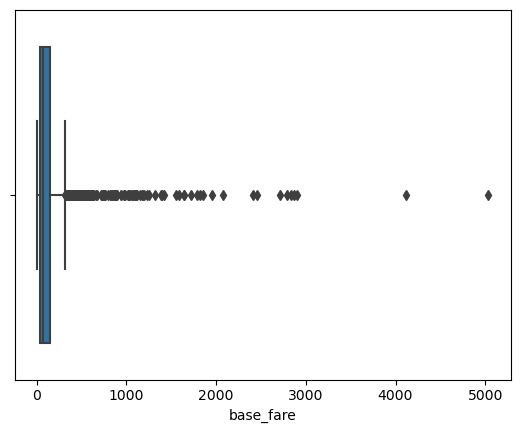

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


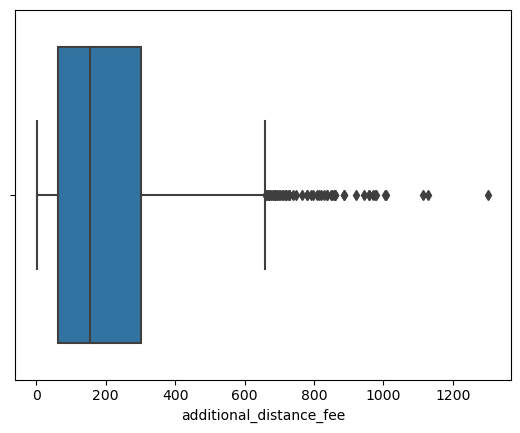

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


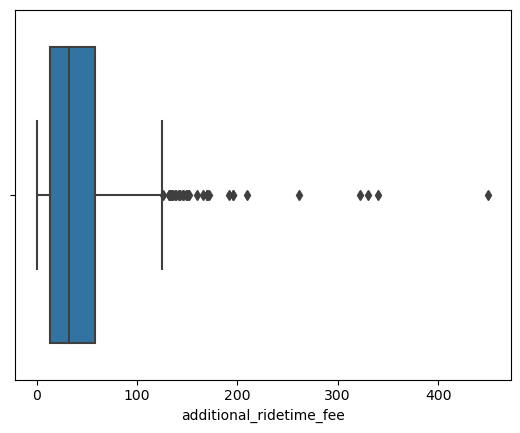

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


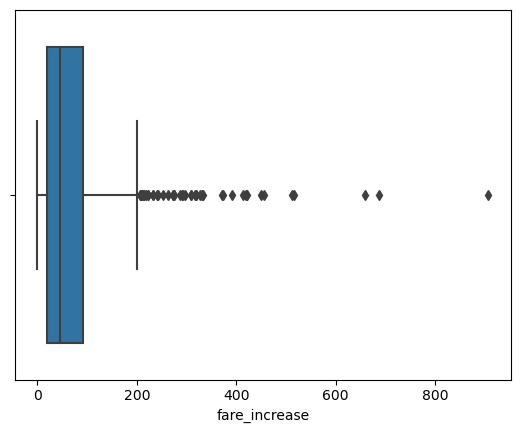

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


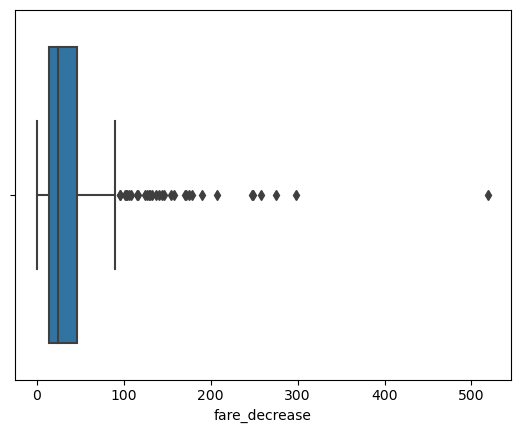

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


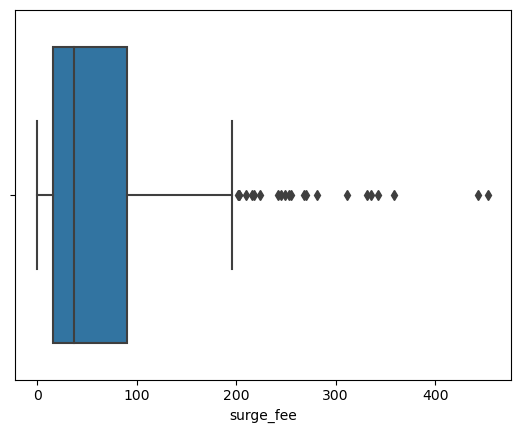

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


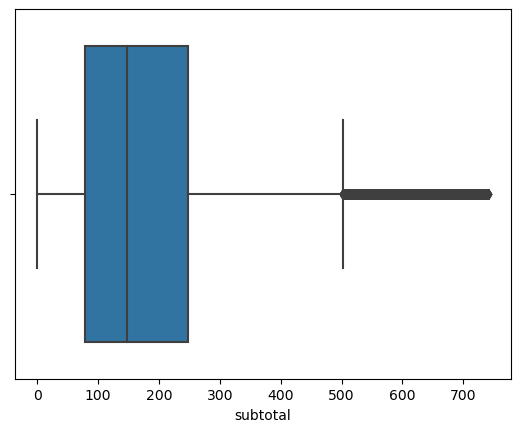

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


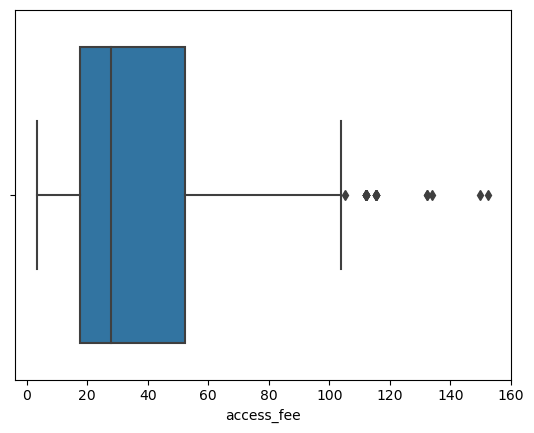

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


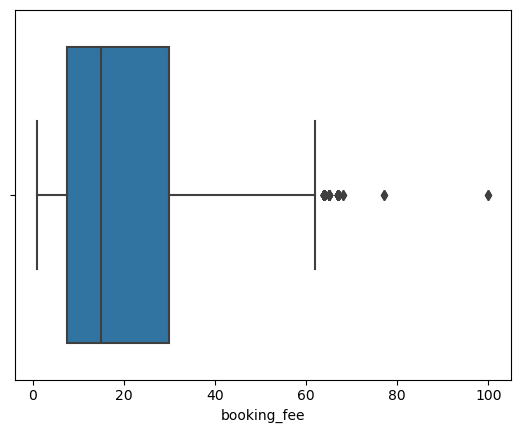

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


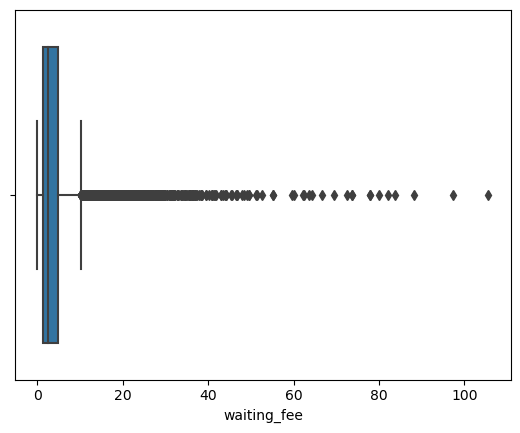

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


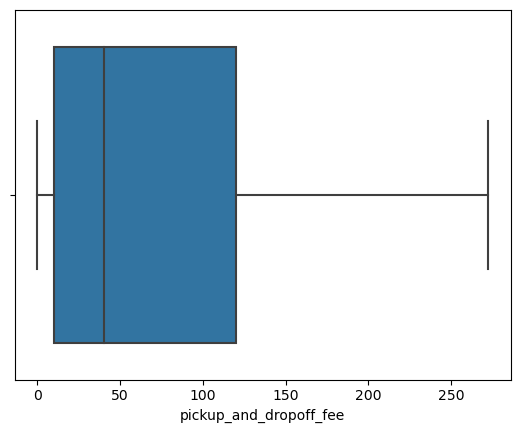

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


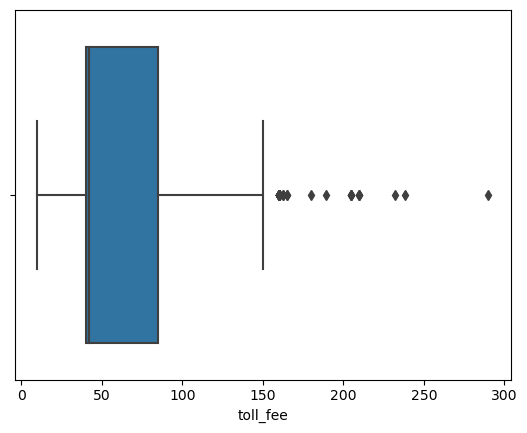

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


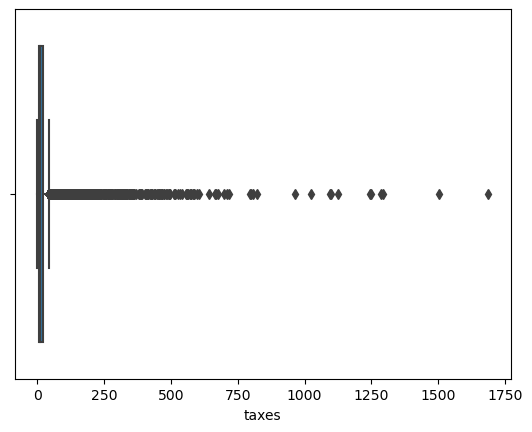

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


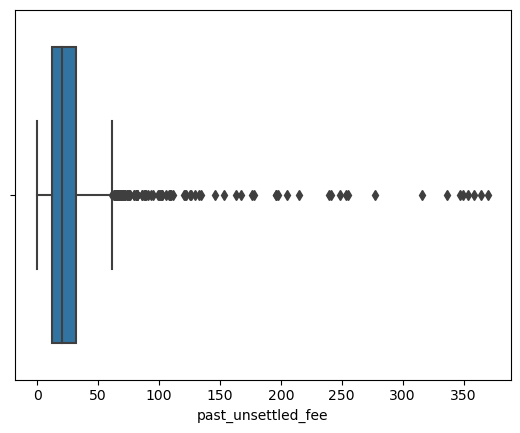

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


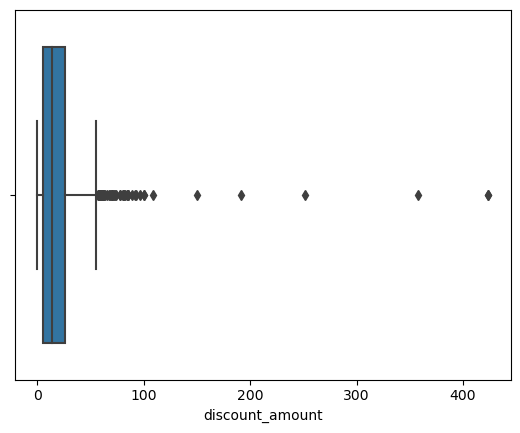

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


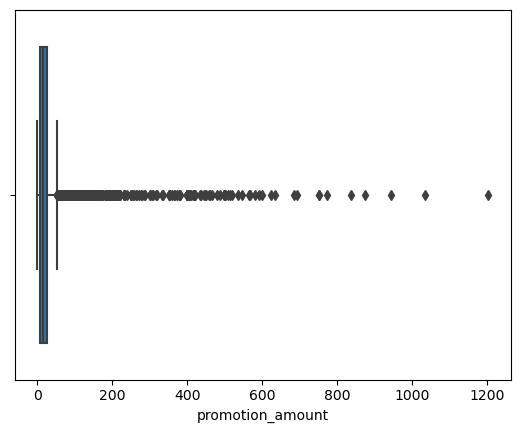

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


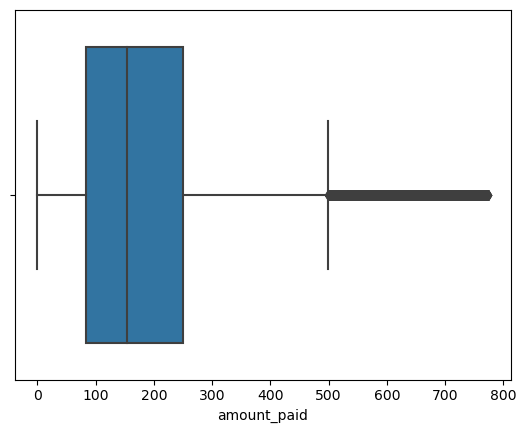

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


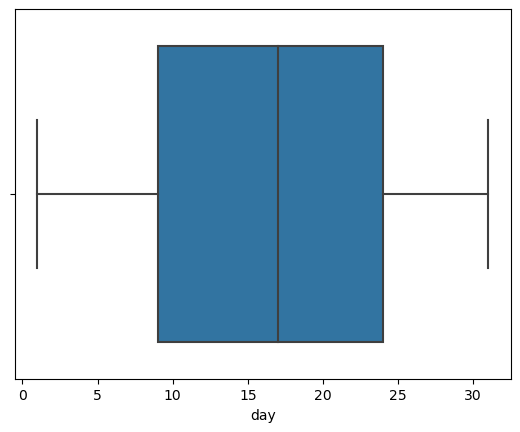

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


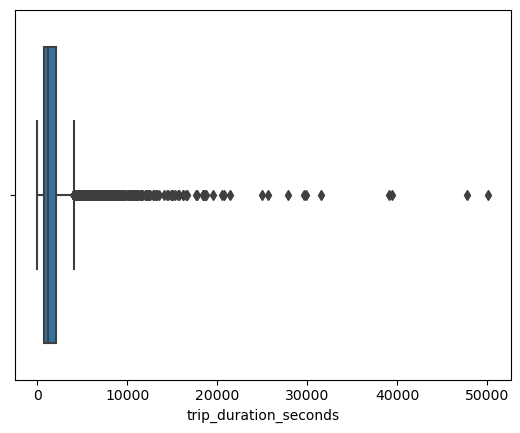

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


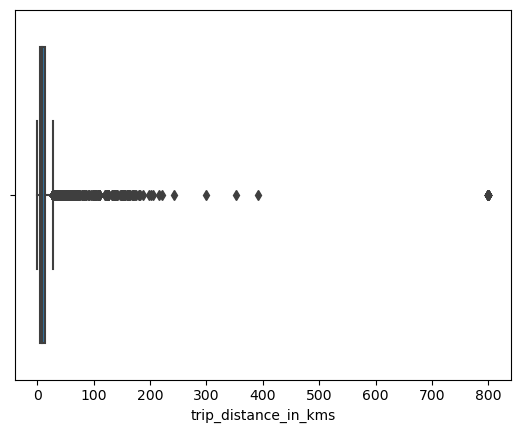

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


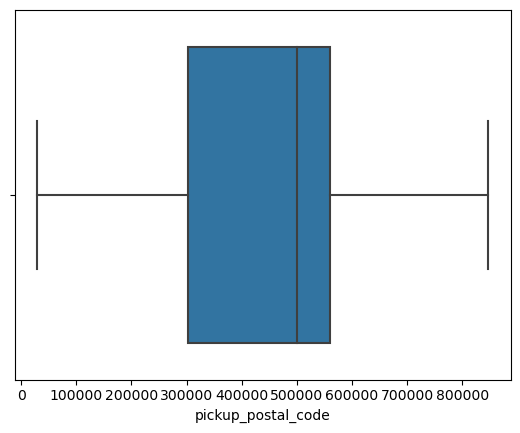

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


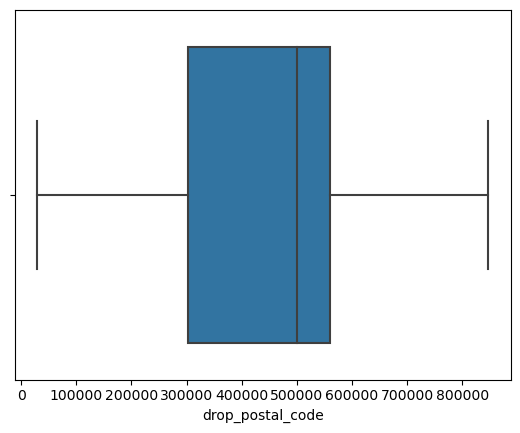

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


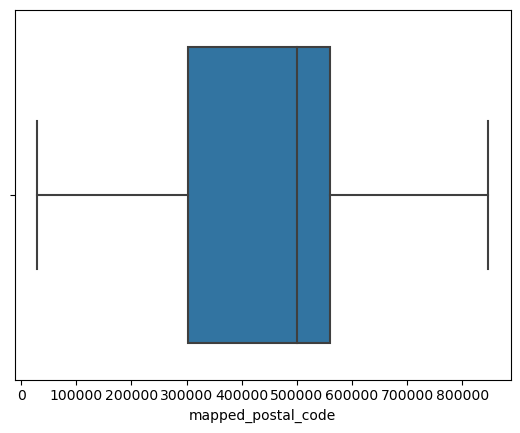

In [1666]:
for feature in cont_features:
    sns.boxplot(data[feature])
    plt.show()

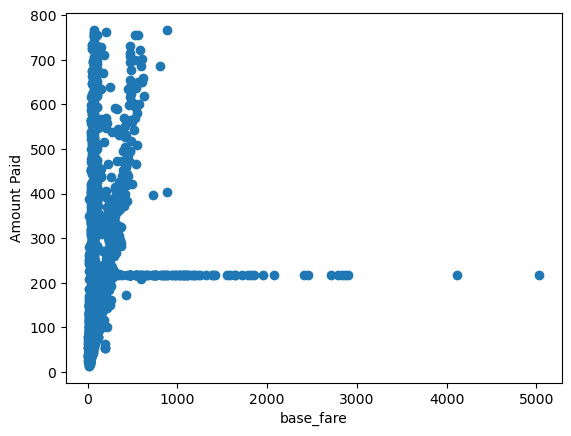

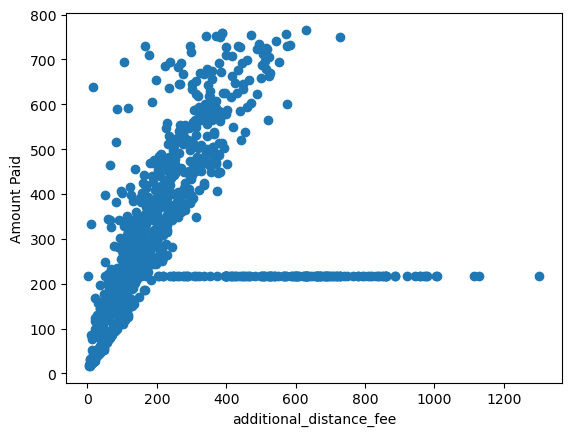

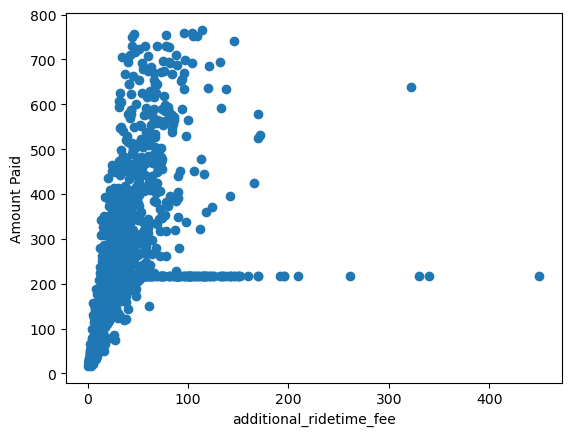

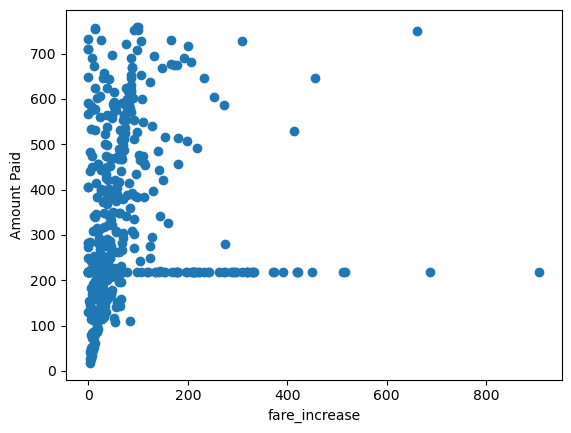

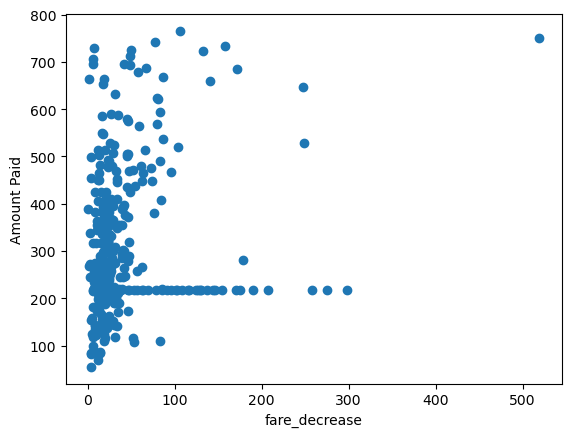

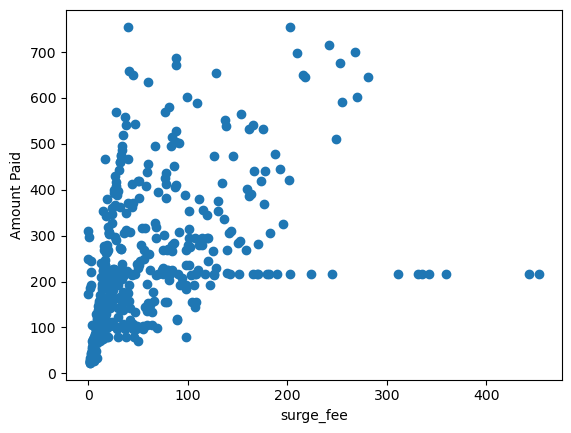

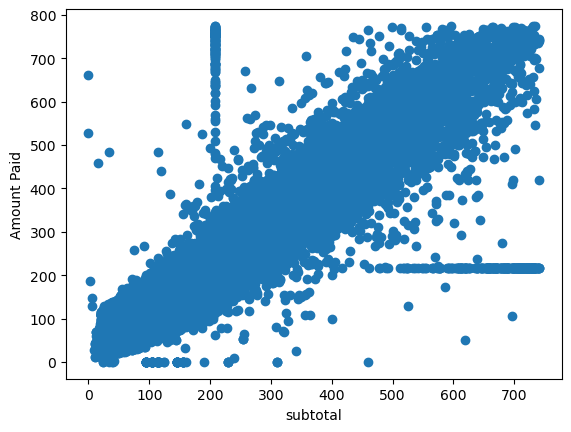

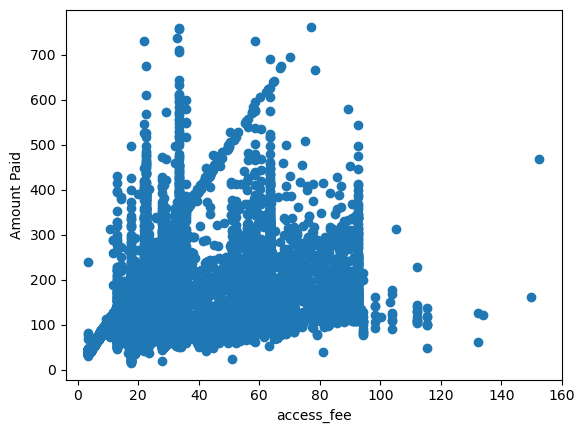

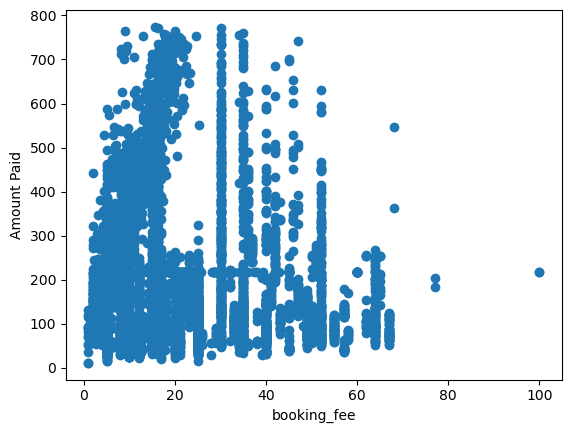

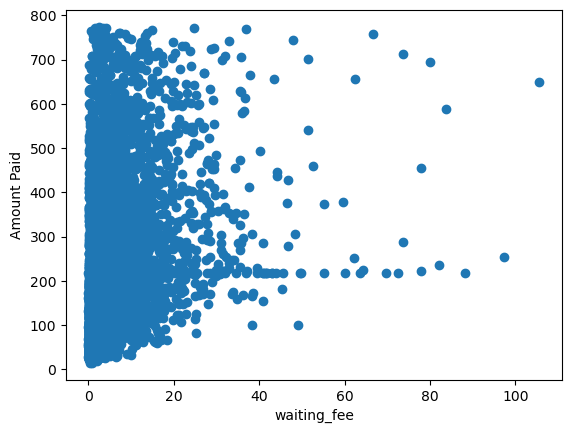

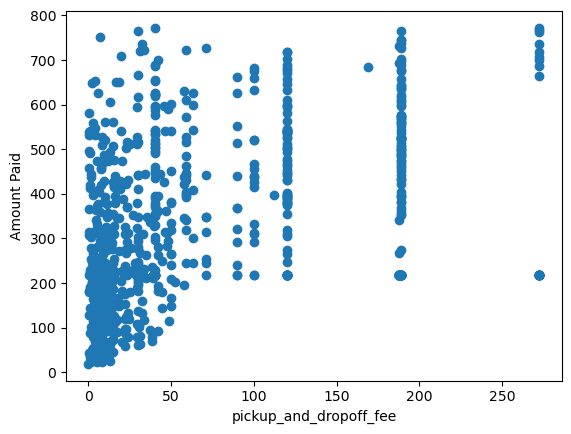

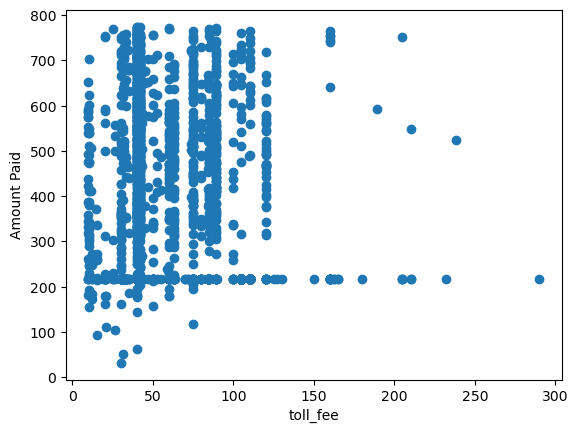

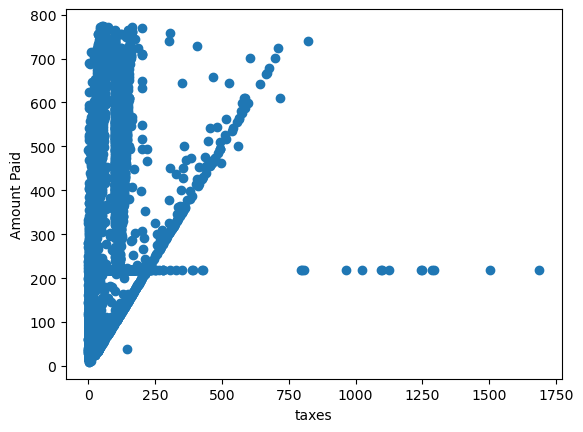

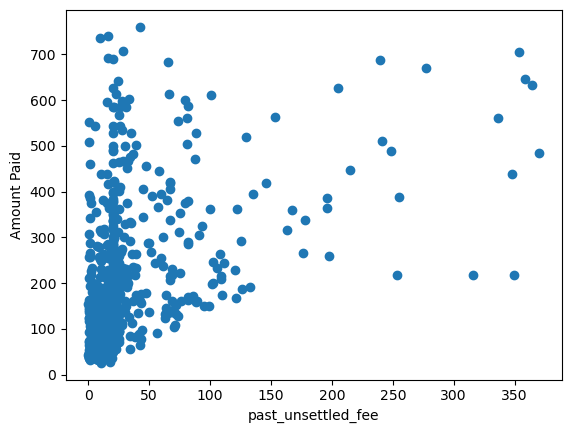

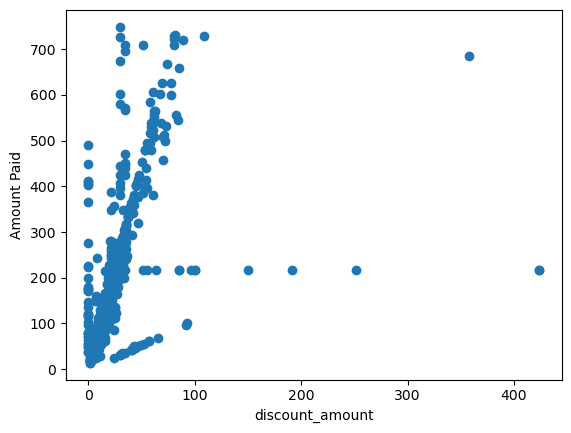

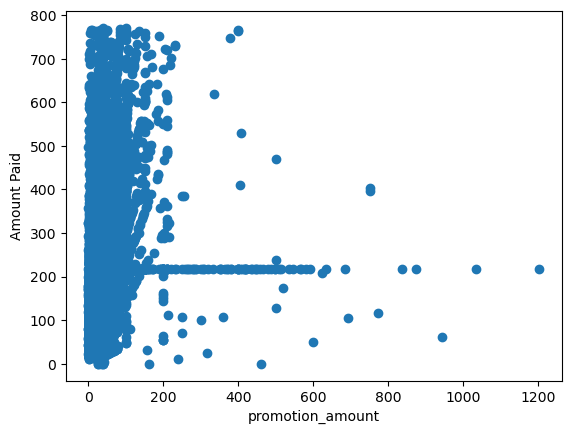

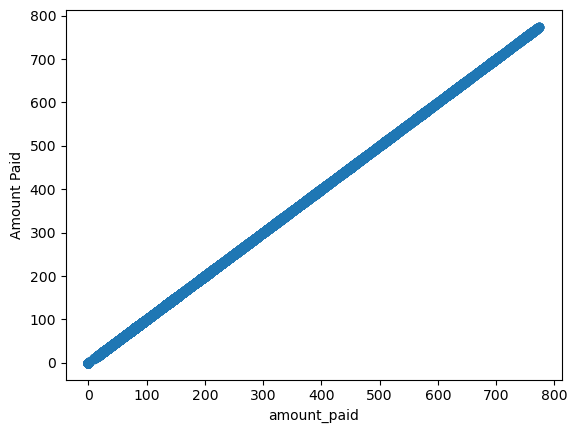

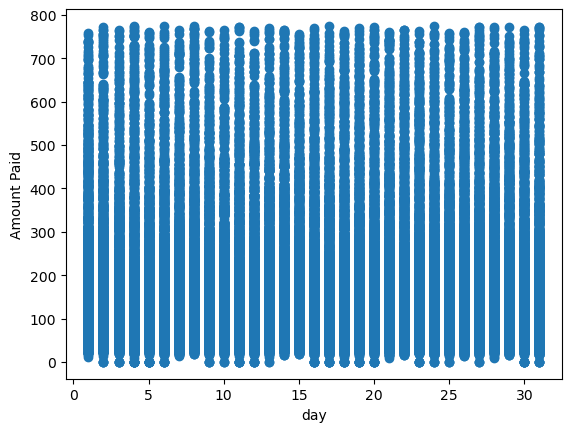

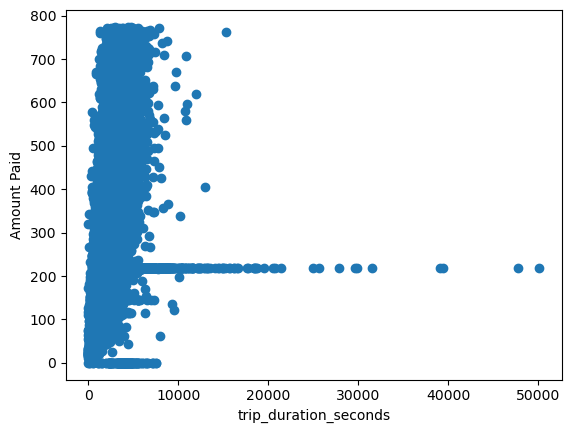

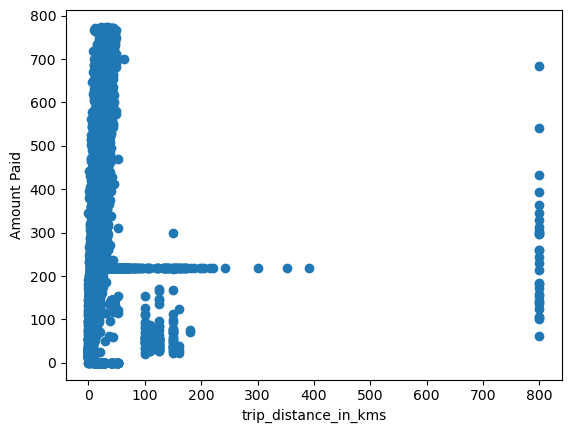

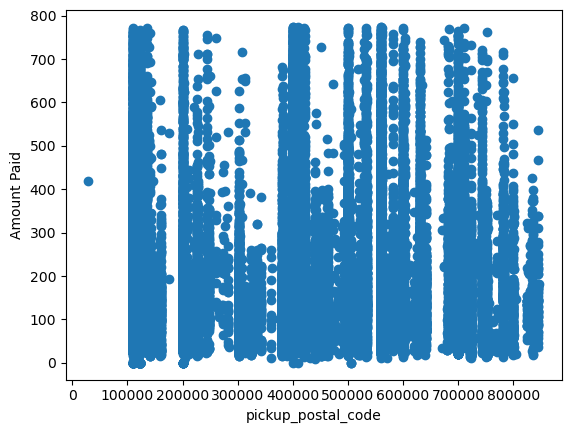

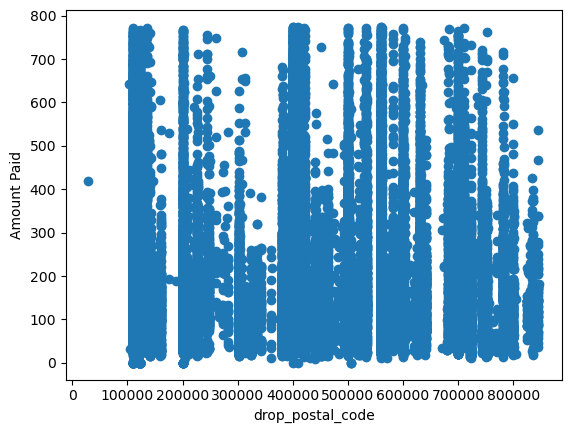

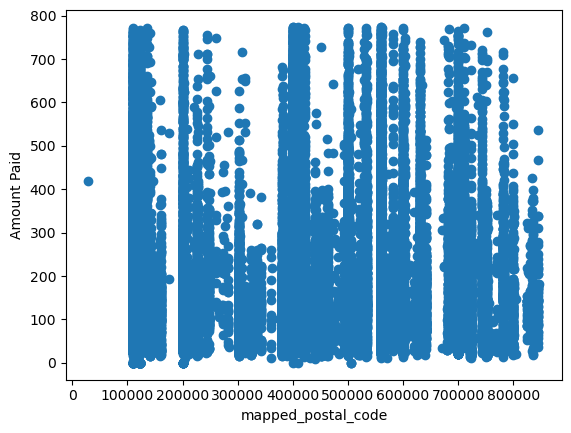

In [1667]:
for feature in cont_features:
    plt.scatter(data[feature],data['amount_paid'])
    plt.xlabel(feature)
    plt.ylabel('Amount Paid')
    plt.show()


In [1668]:
target=data['amount_paid']
data.drop(['amount_paid'],inplace=True,axis=1)
data['amount_paid']=target

In [1669]:
data.head()

,base_fare,additional_distance_fee,additional_ridetime_fee,fare_increase,fare_decrease,surge_fee,subtotal,access_fee,booking_fee,waiting_fee,pickup_and_dropoff_fee,toll_fee,interstate_fee,taxes,donation,past_unsettled_fee,other_charges_fee,discount_amount,promotion_amount,other_charges,applied_coupon,user_onboard_at,day,trip_duration_seconds,trip_distance_in_kms,pickup_postal_code,drop_postal_code,mapped_postal_code,city,district_grp,amount_paid
0,NaN,NaN,NaN,NaN,NaN,NaN,261.11,NaN,11.0,NaN,NaN,NaN,NaN,15.85,NaN,NaN,NaN,NaN,21.77,NaN,NaN,2020-04-09 20:14:02+00:00,1,2460.0,17.22,500034.0,500034.0,500034.0,hyderabad,hyderabad,250.00
1,NaN,NaN,NaN,NaN,NaN,NaN,280.29,NaN,36.0,NaN,NaN,NaN,NaN,13.34,NaN,NaN,NaN,NaN,37.95,NaN,NaN,2020-08-26 06:16:08+00:00,1,2040.0,17.91,400706.0,400706.0,400706.0,navi mumbai,mumbai mpr,278.00
2,NaN,NaN,NaN,NaN,NaN,NaN,425.39,NaN,NaN,NaN,NaN,NaN,NaN,30.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-21 18:53:09+00:00,1,2280.0,15.19,560001.0,560001.0,560001.0,bangalore,bengaluru,425.39
3,203.54,NaN,NaN,NaN,NaN,91.81,295.35,NaN,NaN,NaN,NaN,NaN,NaN,15.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-21 18:53:09+00:00,1,1260.0,6.83,560075.0,560075.0,560075.0,bangalore,bengaluru,192.20
4,NaN,NaN,NaN,NaN,NaN,NaN,538.84,NaN,NaN,NaN,NaN,NaN,NaN,22.14,NaN,NaN,NaN,NaN,32.77,NaN,NaN,2022-06-21 18:53:09+00:00,1,1560.0,8.60,560037.0,560037.0,560037.0,bangalore,bengaluru,267.76


# Splitting data into train and test

In [1670]:
grouped_company = data.groupby('company_encoded')
ola_data = grouped_company.get_group(0)
uber_data = grouped_company.get_group(1)
ola_data.head()

KeyError: 'company_encoded'

In [ ]:
ola_x=ola_data.iloc[:,:-1]
ola_y=ola_data.iloc[:,-1]
ola_y.head()

In [ ]:
uber_x=uber_data.iloc[:,:-1]
uber_y=uber_data.iloc[:,-1]
uber_y.head()

In [ ]:
ola_x_train,ola_x_test,ola_y_train,ola_y_test=train_test_split(ola_x,ola_y,test_size=0.2,random_state=1)
uber_x_train,uber_x_test,uber_y_train,uber_y_test=train_test_split(uber_x,uber_y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
ola_sc_features = StandardScaler()
ola_x_train_scaled = sc_features.fit_transform(ola_x_train)
ola_x_test_scaled = sc_features.transform(ola_x_test)
ola_sc_target = StandardScaler()
ola_y_train =ola_y_train.values.reshape(-1, 1)
ola_y_train_scaled = sc_target.fit_transform(ola_y_train)

In [ ]:
ola_sc_features = StandardScaler()
uber_x_train_scaled = sc_features.fit_transform(uber_x_train)
uber_x_test_scaled = sc_features.transform(uber_x_test)
ola_sc_target = StandardScaler()
uber_y_train =uber_y_train.values.reshape(-1, 1)
uber_y_train_scaled = sc_target.fit_transform(uber_y_train)

# Building the model

# Linear regression model

In [ ]:
ola_lr=LinearRegression()
ola_lr.fit(ola_x_train,ola_y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
uber_lr=LinearRegression()
uber_lr.fit(uber_x_train,uber_y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ola_y_pred=lr.predict(ola_x_test)

In [ ]:
uber_y_pred=lr.predict(uber_x_test)

In [ ]:
np.mean(list(ola_y_pred))

In [ ]:
np.mean(list(uber_y_pred))

In [ ]:
print('ola MAE:', mean_absolute_error(ola_y_test,ola_y_pred))
print('ola MSE:', mean_squared_error(ola_y_test, ola_y_pred))
print('ola RMSE:', np.sqrt(mean_squared_error(ola_y_test,ola_y_pred)))

In [ ]:
rscore=ola_lr.score(ola_x_test,ola_y_test)
rscore

In [ ]:
print('uber MAE:', mean_absolute_error(uber_y_test,uber_y_pred))
print('uber MSE:', mean_squared_error(uber_y_test, uber_y_pred))
print('uber RMSE:', np.sqrt(mean_squared_error(uber_y_test,uber_y_pred)))

In [ ]:
rscore=uber_lr.score(uber_x_test,uber_y_test)
rscore

# Ridge regression model

In [ ]:
ridge=Ridge(alpha=0.005,normalize=True)
ridge.fit(ola_x_train,ola_y_train)
ola_y_pred=ridge.predict(ola_x_test)

In [ ]:
ridge=Ridge(alpha=0.005,normalize=True)
ridge.fit(uber_x_train,uber_y_train)
uber_y_pred=ridge.predict(uber_x_test)

In [ ]:
np.mean(list(ola_y_pred))

In [ ]:
np.mean(list(uber_y_pred))

In [ ]:
ola_rscore=ridge.score(ola_x_test,ola_y_test)
ola_rscore

In [ ]:
uber_rscore=ridge.score(uber_x_test,uber_y_test)
uber_rscore

In [ ]:
print('ola MAE:', mean_absolute_error(ola_y_test,ola_y_pred))
print('ola MSE:', mean_squared_error(ola_y_test, ola_y_pred))
print('ola RMSE:', np.sqrt(mean_squared_error(ola_y_test,ola_y_pred)))

In [ ]:
print('uber MAE:', mean_absolute_error(uber_y_test,uber_y_pred))
print('uber MSE:', mean_squared_error(uber_y_test, uber_y_pred))
print('uber RMSE:', np.sqrt(mean_squared_error(uber_y_test,uber_y_pred)))

# Lasso regression model

In [ ]:
lasso=Lasso(alpha=0.0005,normalize=True)
lasso.fit(ola_x_train,ola_y_train)
ola_y_pred=lasso.predict(ola_x_test)

In [1671]:
lasso=Lasso(alpha=0.0005,normalize=True)
lasso.fit(uber_x_train,uber_y_train)
uber_y_pred=lasso.predict(uber_x_test)

C:\Users\dbansbanka\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [1672]:
np.mean(list(ola_y_pred))

191.87422176690174

In [1673]:
sum(list(ola_y_pred))


1860796.2026954077

In [1674]:
sum(list(uber_y_pred))

1860796.2026954077

In [1675]:
np.mean(list(uber_y_pred))

191.87422176690174

In [1676]:
print('ola MAE:', mean_absolute_error(ola_y_test,ola_y_pred))
print('ola MSE:', mean_squared_error(ola_y_test, ola_y_pred))
print('ola RMSE:', np.sqrt(mean_squared_error(ola_y_test,ola_y_pred)))

ola MAE: 24.137565223611137
ola MSE: 2783.452284529529
ola RMSE: 52.7584333024544


In [1677]:
print('uber MAE:', mean_absolute_error(uber_y_test,uber_y_pred))
print('uber MSE:', mean_squared_error(uber_y_test, uber_y_pred))
print('uber RMSE:', np.sqrt(mean_squared_error(uber_y_test,uber_y_pred)))

uber MAE: 24.137565223611137
uber MSE: 2783.452284529529
uber RMSE: 52.7584333024544


In [1678]:
ola_rscore=lasso.score(ola_x_test,ola_y_test)
ola_rscore

0.8698427003393884

In [1679]:
uber_rscore=lasso.score(uber_x_test,uber_y_test)
uber_rscore

0.8698427003393884

# Extra Trees Regressor Model

In [ ]:
ola_x_train,ola_x_test,ola_y_train,ola_y_test=train_test_split(x,y,test_size=0.2,random_state=0)
uber_x_train,uber_x_test,uber_y_train,uber_y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=ExtraTreesRegressor()
model.fit(ola_x_train,ola_y_train)
model.fit(uber_x_train,uber_y_train)

In [ ]:
array=model.feature_importances_

In [ ]:
ser=pd.Series(array,index=ola_x_train.columns).sort_values(ascending=False)
ser.head()

In [ ]:
ser=pd.Series(array,index=uber_x_train.columns).sort_values(ascending=False)
ser.head()

In [ ]:
ser.plot(kind='barh')

# Random Forest Regressor

In [ ]:
n_estimators=[x for x in range(10,100,10)]
max_features=['auto','sqrt','log2']
max_depth=[x for x in range(5,30,5)]
min_sample_leaf=[2,4,6,8,10]
min_sample_split=[2,3,4,5]
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_leaf':min_sample_leaf,
    'min_samples_split':min_sample_split
}
model=RandomForestRegressor()
model.get_params

In [ ]:
rd=RandomizedSearchCV(estimator=model,param_distributions=random_grid,cv=5,n_iter=10,verbose=2,random_state=0,scoring='neg_mean_squared_error')

In [ ]:
rd.fit(ola_x_train,ola_y_train)

In [ ]:
rd.fit(uber_x_train,uber_y_train)

In [ ]:
rd.best_params_

In [ ]:
model=RandomForestRegressor(n_estimators=70,min_samples_split=5,min_samples_leaf=2,max_features='auto',max_depth=20)
model.fit(ola_x_train,ola_y_train)

In [ ]:
model=RandomForestRegressor(n_estimators=70,min_samples_split=5,min_samples_leaf=2,max_features='auto',max_depth=20)
model.fit(uber_x_train,uber_y_train)

In [ ]:
y_pred=model.predict(ola_x_test)
model.score(ola_x_test,ola_y_test)


In [ ]:
y_pred=model.predict(uber_x_test)
model.score(uber_x_test,uber_y_test)


In [ ]:
sns.distplot(ola_y_test-ola_y_pred)

In [ ]:
sns.distplot(uber_y_test-uber_y_pred)

In [ ]:
sns.distplot(ola_y_test)

In [ ]:
sns.distplot(uber_y_test)

In [ ]:
plt.scatter(ola_y_test,ola_y_pred)

In [ ]:
plt.scatter(uber_y_test,uber_y_pred)

In [ ]:
print('ola MAE:', mean_absolute_error(ola_y_test,ola_y_pred))
print('ola MSE:', mean_squared_error(ola_y_test, ola_y_pred))
print('ola RMSE:', np.sqrt(mean_squared_error(ola_y_test,ola_y_pred)))

In [ ]:
print('uber MAE:', mean_absolute_error(uber_y_test,uber_y_pred))
print('uber MSE:', mean_squared_error(uber_y_test, uber_y_pred))
print('uber RMSE:', np.sqrt(mean_squared_error(uber_y_test,uber_y_pred)))

# Accuracy Analysis

# INFERENCE

In [ ]:
Based on the evaluation metrics you have provided, the Lasso regression model would be a better choice for both Ola and Uber 
datasets, compared to Linear Regression and Ridge Regression models.

1.Lower Mean Absolute Error (MAE): The Lasso regression model has lower MAE values for both Ola and Uber datasets, 
compared to the other models. MAE measures the average absolute difference between the predicted and actual values, 
so lower MAE indicates better performance.

2.Lower Root Mean Squared Error (RMSE): The Lasso regression model has lower RMSE values for the Ola dataset, 
and slightly higher RMSE values for the Uber dataset, compared to the other models. RMSE measures the square root 
of the average squared difference between the predicted and actual values, so lower RMSE indicates better performance.

3.Higher R-squared (rscore): The Lasso regression model has higher R-squared values for both Ola and Uber datasets, 
compared to the other models. R-squared measures the proportion of variance in the dependent variable that is explained by 
the independent variable(s) in the model, so higher R-squared indicates better fit.

Overall, the Lasso regression model is better because it has lower MAE and RMSE values and higher R-squared values, 
indicating better performance and fit for both Ola and Uber datasets.

# Answer

In [ ]:
Average Revenue per Person_OLA::200.25579408797657
Average Revenue per Person_UBER:182.02342683698456

    
Total Sales Value = (Total Number of People in India) x (Average Revenue per Person)
Total number of people in the sample(test sample is 20% of total sample): 20% of 48490=9698
Total revenue generated in the sample OLA: Rs. 1860796.2026954077
Total revenue generated in the sample UBER: Rs. 1860758.2025838124


Average Revenue per Person = Total Revenue Generated / Total Number of People in the Sample

Average Revenue per Person OLA= Rs. 1860796.2026954077 / 9698  = 200.25579408797657
Average Revenue per Person UBER= Rs. 1860758.2025838124 /9698  =  182.02342683698456

Next, to calculate the total sales value for Ola and Uber for the whole population of India,  multiply the 
average revenue per person by the monthly active users of OLA nd UBER in India. According to the 2023 population estimates
(SOURCE: https://www.worldometers.info/world-population/india-population/#:~:text=The%20current%20population%20of%20India,the%20latest%
20United%20Nations%20data.)

Total Sales Value OLA =Rs. 24 million x 200.25579408797657 

Total Sales Value OLA = Rs. 4.806 billion

Total Sales Value UBER =Rs. 13.13 million x 182.02342683698456 

Total Sales Value UBER= Rs. 2.3 billion



**According to online stats (which is data from 2020-2021) 
**Total Sales Value UBER:Rs. 1.79 billion
**Total Sales Value OLA: Rs. 5.5 billion



